4.

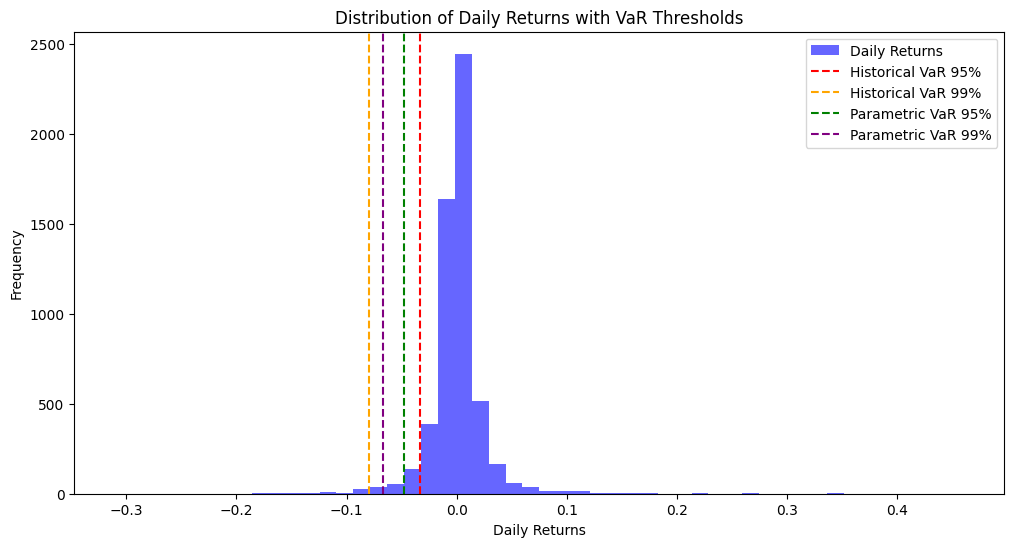

Historical VaR:
  95% Confidence Level: -0.0333
  99% Confidence Level: -0.0797

Parametric VaR:
  95% Confidence Level: -0.0475
  99% Confidence Level: -0.0673


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the dataset
file_path = '/content/John Keells Holdings PLC.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
# Convert 'Trade Date' to datetime and sort by date
data['Trade Date'] = pd.to_datetime(data['Trade Date'], errors='coerce')
data = data.sort_values('Trade Date')

# Drop rows with missing 'Close (Rs.)' values
data = data.dropna(subset=['Close (Rs.)'])

# Calculate Daily Returns
data['Daily Returns'] = data['Close (Rs.)'].pct_change()

# Drop the first row with NaN daily returns
data = data.dropna(subset=['Daily Returns'])

# Historical VaR Calculation
confidence_levels = [0.95, 0.99]
historical_var = {}

# Sort daily returns for VaR calculation
sorted_returns = np.sort(data['Daily Returns'])

# Calculate Historical VaR for each confidence level
for cl in confidence_levels:
    var_value = np.percentile(sorted_returns, (1 - cl) * 100)
    historical_var[cl] = var_value

# Parametric VaR Calculation
mean_return = data['Daily Returns'].mean()
std_dev = data['Daily Returns'].std()
parametric_var = {}

for cl in confidence_levels:
    z_alpha = norm.ppf(1 - cl)  # Z-score for the confidence level
    parametric_var[cl] = mean_return + std_dev * z_alpha

# Visualization of Daily Returns and VaR Thresholds
plt.figure(figsize=(12, 6))
plt.hist(data['Daily Returns'], bins=50, alpha=0.6, color='blue', label='Daily Returns')
plt.axvline(historical_var[0.95], color='red', linestyle='--', label='Historical VaR 95%')
plt.axvline(historical_var[0.99], color='orange', linestyle='--', label='Historical VaR 99%')
plt.axvline(parametric_var[0.95], color='green', linestyle='--', label='Parametric VaR 95%')
plt.axvline(parametric_var[0.99], color='purple', linestyle='--', label='Parametric VaR 99%')
plt.title('Distribution of Daily Returns with VaR Thresholds')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print VaR Results
print("Historical VaR:")
for cl, var in historical_var.items():
    print(f"  {int(cl * 100)}% Confidence Level: {var:.4f}")

print("\nParametric VaR:")
for cl, var in parametric_var.items():
    print(f"  {int(cl * 100)}% Confidence Level: {var:.4f}")


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/JKH_cleaned_data.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
# Convert 'Trade Date' to datetime and sort by date
data['Trade Date'] = pd.to_datetime(data['Trade Date'], errors='coerce')
data = data.sort_values('Trade Date')

# Drop rows with missing 'Close (Rs.)' values
data = data.dropna(subset=['Close (Rs.)'])

# Group data by 'Acquirer Name'
grouped_data = data.groupby('Acquirer Name')

# Initialize a dictionary to store VaR results for each company
var_results = []

for company, group in grouped_data:
    # Calculate Daily Returns for the company's data
    group = group.copy()  # Avoid modifying the original group
    group['Daily Returns'] = group['Close (Rs.)'].pct_change()
    group = group.dropna(subset=['Daily Returns'])  # Drop NaN values for daily returns

    # Historical VaR Calculation
    confidence_levels = [0.95, 0.99]
    historical_var = {}

    # Sort daily returns for VaR calculation
    sorted_returns = np.sort(group['Daily Returns'])

    # Calculate Historical VaR for each confidence level
    for cl in confidence_levels:
        var_value = np.percentile(sorted_returns, (1 - cl) * 100)
        historical_var[cl] = var_value

    # Parametric VaR Calculation
    mean_return = group['Daily Returns'].mean()
    std_dev = group['Daily Returns'].std()
    parametric_var = {}

    for cl in confidence_levels:
        z_alpha = norm.ppf(1 - cl)  # Z-score for the confidence level
        parametric_var[cl] = mean_return + std_dev * z_alpha

    # Store results for this company
    var_results.append({
        "Acquirer Name": company,
        "Historical VaR 95%": historical_var[0.95],
        "Historical VaR 99%": historical_var[0.99],
        "Parametric VaR 95%": parametric_var[0.95],
        "Parametric VaR 99%": parametric_var[0.99]
    })

# Convert results into a DataFrame
results_df = pd.DataFrame(var_results)

# Display or Save Results
print(results_df)

# Optionally save the results to a CSV file
results_df.to_csv('VaR_Results_by_Acquirer.csv', index=False)


                       Acquirer Name  Historical VaR 95%  Historical VaR 99%  \
0                     ACL Cables PLC           -0.167972           -0.507818   
1   Aitken Spence Hotel Holdings PLC           -0.132055           -0.384625   
2       Asiri Hospitals Holdings PLC           -0.130512           -0.309496   
3                Cargills Ceylon PLC           -0.133137           -0.485007   
4        Carson Cumberbatch & Co PLC           -0.145943           -0.467513   
5                 Citrus Leisure PLC           -0.201493           -0.500000   
6                  Dialog Axiata PLC           -0.125000           -0.269631   
7   Distilleries Co of Sri Lanka PLC           -0.130036           -0.341045   
8             Expolanka Holdings PLC           -0.131829           -0.493909   
9                        Hayleys PLC           -0.134319           -0.357052   
10                Hemas Holdings PLC           -0.131956           -0.292174   
11          John Keells Holdings PLC    

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/JKH_cleaned_data.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
# Convert 'Trade Date' to datetime and sort by date
data['Trade Date'] = pd.to_datetime(data['Trade Date'], errors='coerce')
data = data.sort_values('Trade Date')

# Drop rows with missing 'Close (Rs.)' values
data = data.dropna(subset=['Close (Rs.)'])

# Group data by 'Acquirer Name'
grouped_data = data.groupby('Acquirer Name')

# Initialize a dictionary to store VaR results for each company
var_results = []

for company, group in grouped_data:

  # Replace infinite and NaN values in 'Daily Returns' with a finite value
    group['Daily Returns'] = group['Daily Returns'].replace([np.inf, -np.inf], np.nan)
    group['Daily Returns'] = group['Daily Returns'].fillna(group['Daily Returns'].mean())

    # Calculate Daily Returns for the company's data
    group = group.copy()  # Avoid modifying the original group
    group['Daily Returns'] = group['Close (Rs.)'].pct_change()
    group = group.dropna(subset=['Daily Returns'])  # Drop NaN values for daily returns

    # Historical VaR Calculation
    confidence_levels = [0.95, 0.99]
    historical_var = {}

    # Sort daily returns for VaR calculation
    sorted_returns = np.sort(group['Daily Returns'])

    # Calculate Historical VaR for each confidence level
    for cl in confidence_levels:
        var_value = np.percentile(sorted_returns, (1 - cl) * 100)
        historical_var[cl] = var_value

    # Parametric VaR Calculation
    mean_return = group['Daily Returns'].mean()
    std_dev = group['Daily Returns'].std()
    parametric_var = {}

    for cl in confidence_levels:
        z_alpha = norm.ppf(1 - cl)  # Z-score for the confidence level
        parametric_var[cl] = mean_return + std_dev * z_alpha

    # Store results for this company
    var_results.append({
        "Acquirer Name": company,
        "Historical VaR 95%": historical_var[0.95],
        "Historical VaR 99%": historical_var[0.99],
        "Parametric VaR 95%": parametric_var[0.95],
        "Parametric VaR 99%": parametric_var[0.99]
    })

    # Visualization of Daily Returns and VaR Thresholds
    plt.figure(figsize=(10, 6))
    plt.hist(group['Daily Returns'], bins=50, alpha=0.7, color='blue', label='Daily Returns')

    # Add VaR Thresholds
    plt.axvline(historical_var[0.95], color='red', linestyle='--', label='Historical VaR 95%')
    plt.axvline(historical_var[0.99], color='orange', linestyle='--', label='Historical VaR 99%')
    plt.axvline(parametric_var[0.95], color='green', linestyle='--', label='Parametric VaR 95%')
    plt.axvline(parametric_var[0.99], color='purple', linestyle='--', label='Parametric VaR 99%')

    plt.title(f'Daily Returns and VaR Thresholds for {company}')
    plt.xlabel('Daily Returns')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Convert results into a DataFrame
results_df = pd.DataFrame(var_results)

# Display or Save Results
print(results_df)

# Optionally save the results to a CSV file
results_df.to_csv('VaR_Results_by_Acquirer.csv', index=False)


KeyError: 'Daily Returns'

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/JKH_cleaned_data.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
# Convert 'Trade Date' to datetime and sort by date
data['Trade Date'] = pd.to_datetime(data['Trade Date'], errors='coerce')
data = data.sort_values('Trade Date')

# Drop rows with missing 'Close (Rs.)' values
data = data.dropna(subset=['Close (Rs.)'])

# Group data by 'Acquirer Name'
grouped_data = data.groupby('Acquirer Name')

# Initialize a dictionary to store VaR results for each company
var_results = []

for company, group in grouped_data:
    # Calculate Daily Returns for the company's data
    group = group.copy()  # Avoid modifying the original group
    group['Daily Returns'] = group['Close (Rs.)'].pct_change()
    group = group.dropna(subset=['Daily Returns'])  # Drop NaN values for daily returns

    # Replace infinite and NaN values in 'Daily Returns' with a finite value **after** calculating Daily Returns
    group['Daily Returns'] = group['Daily Returns'].replace([np.inf, -np.inf], np.nan)
    group['Daily Returns'] = group['Daily Returns'].fillna(group['Daily Returns'].mean())

    # Historical VaR Calculation
    confidence_levels = [0.95, 0.99]
    historical_var = {}

    # Sort daily returns for VaR calculation
    sorted_returns = np.sort(group['Daily Returns'])

    # Calculate Historical VaR for each confidence level
    for cl in confidence_levels:
        var_value = np.percentile(sorted_returns, (1 - cl) * 100)
        historical_var[cl] = var_value

    # Parametric VaR Calculation
    mean_return = group['Daily Returns'].mean()
    std_dev = group['Daily Returns'].std()
    parametric_var = {}

    for cl in confidence_levels:
        z_alpha = norm.ppf(1 - cl)  # Z-score for the confidence level
        parametric_var[cl] = mean_return + std_dev * z_alpha

    # Store results for this company
    var_results.append({
        "Acquirer Name": company,
        "Historical VaR 95%": historical_var[0.95],
        "Historical VaR 99%": historical_var[0.99],
        "Parametric VaR 95%": parametric_var[0.95],
        "Parametric VaR 99%": parametric_var[0.99]
    })

    # Visualization of Daily Returns and VaR Thresholds
    plt.figure(figsize=(10, 6))
    plt.hist(group['Daily Returns'], bins=50, alpha=0.7, color='blue', label='Daily Returns')

    # Add VaR Thresholds
    plt.axvline(historical_var[0.95], color='red', linestyle='--', label='Historical Va

SyntaxError: unterminated string literal (detected at line 69) (<ipython-input-3-a525c23cbfeb>, line 69)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/merged_stock_data (9).csv'  # Update with your file path
data = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
# Convert 'Trade Date' to datetime and sort by date
data['Trade Date'] = pd.to_datetime(data['Trade Date'], errors='coerce')
data = data.sort_values('Trade Date')

# Drop rows with missing 'Close (Rs.)' values
data = data.dropna(subset=['Close (Rs.)'])

# Group data by 'Acquirer Name'
grouped_data = data.groupby('Acquirer Name')

# Initialize a dictionary to store VaR results for each company
var_results = []

for company, group in grouped_data:
    # Calculate Daily Returns for the company's data
    group = group.copy()  # Avoid modifying the original group
    group['Daily Returns'] = group['Close (Rs.)'].pct_change()
    group = group.dropna(subset=['Daily Returns'])  # Drop NaN values for daily returns

    # Replace infinite and NaN values in 'Daily Returns' with a finite value
    group['Daily Returns'] = group['Daily Returns'].replace([np.inf, -np.inf], np.nan)
    group['Daily Returns'] = group['Daily Returns'].fillna(group['Daily Returns'].mean())

    # Historical VaR Calculation
    confidence_levels = [0.95, 0.99]
    historical_var = {}

    # Sort daily returns for VaR calculation
    sorted_returns = np.sort(group['Daily Returns'])

    # Calculate Historical VaR for each confidence level
    for cl in confidence_levels:
        var_value = np.percentile(sorted_returns, (1 - cl) * 100)
        historical_var[cl] = var_value

    # Parametric VaR Calculation
    mean_return =

SyntaxError: invalid syntax (<ipython-input-1-a58cd4695047>, line 47)

In [ ]:
import pandas as pd

# Load the uploaded data to inspect its structure
file_path = '/content/merged_stock_data (9).csv'
stock_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for inspection
stock_data.head()


Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
0  2000-03-12        37.5        37.5       37.5         37.5            1   
1  2000-11-12        37.5        37.5       37.5         37.5            1   
2  2000-11-30        38.0        38.0       38.0         38.0            3   
3  2000-12-12        37.5        37.5       37.5         37.5            3   
4  2000-12-14        37.5        37.5       37.5         37.5            4   

   ShareVolume  Turnover (Rs.)   Acquirer Name                        Sector  \
0         3000        112500.0  ACL Cables PLC  Manufacturing and Industrial   
1          100          3750.0  ACL Cables PLC  Manufacturing and Industrial   
2         1000         38000.0  ACL Cables PLC  Manufacturing and Industrial   
3         4400        165000.0  ACL Cables PLC  Manufacturing and Industrial   
4         1100         41250.0  ACL Cables PLC  Manufacturing and Industrial   

   Start Date   Period  
0  2014-01-04  Pre-M&A  
1  2014-01-04  Pre-M&A  
2  2014-01-04  Pre-M&A  
3  2014-01-04  Pre-M&A  
4  2014-01-04  Pre-M&A

In [ ]:
# Convert Trade Date to datetime for time series analysis
stock_data['Trade Date'] = pd.to_datetime(stock_data['Trade Date'])

# Sort data by Acquirer Name and Trade Date
stock_data = stock_data.sort_values(by=['Acquirer Name', 'Trade Date'])

# Calculate daily returns for each acquiring firm's stock
stock_data['Daily Return'] = stock_data.groupby('Acquirer Name')['Close (Rs.)'].pct_change()

# Drop rows with NaN values resulting from percentage change calculation
stock_data = stock_data.dropna(subset=['Daily Return'])

# Define a function to compute VaR percentiles
def calculate_var(data, confidence_levels=[0.95, 0.99]):
    result = {}
    for level in confidence_levels:
        var = data.quantile(1 - level)
        result[f"VaR {int(level*100)}%"] = var
    return result

# Group by Acquirer Name and compute VaR percentiles
var_results = stock_data.groupby('Acquirer Name')['Daily Return'].apply(calculate_var).unstack()
var_results
# Display the VaR results to the user
#import ace_tools as tools; tools.display_dataframe_to_user(name="Value at Risk (VaR) Percentiles", dataframe=var_results)


VaR 95%   VaR 99%
Acquirer Name                                       
ACL Cables PLC                   -0.167973 -0.507830
Aitken Spence Hotel Holdings PLC -0.132056 -0.384629
Asiri Hospitals Holdings PLC     -0.130087 -0.309503
Cargills Ceylon PLC              -0.133159 -0.485021
Carson Cumberbatch & Co PLC      -0.145955 -0.467568
Citrus Leisure PLC               -0.201495 -0.500000
Dialog Axiata PLC                -0.125000 -0.269657
Distilleries Co of Sri Lanka PLC -0.130037 -0.341068
Expolanka Holdings PLC           -0.131911 -0.494315
Hayleys PLC                      -0.134397 -0.357082
Hemas Holdings PLC               -0.131971 -0.292223
John Keells Holdings PLC         -0.125877 -0.295503
Kelani Valley Plantations PLC    -0.166667 -0.451438
National Development Bank PLC    -0.142014 -0.397956
Nations Trust Bank PLC           -0.116279 -0.307656
People's Merchant Finance PLC    -0.116279 -0.307656
Vallibel Power Erathna PLC       -0.102506 -0.282609

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Prepare data for regression
# Using features such as Pre-M&A daily returns, VaR, and volatility as predictors for Post-M&A performance
# Assume the 'Period' column distinguishes Pre-M&A and Post-M&A

# Filter pre- and post-M&A periods
pre_mna = stock_data[stock_data['Period'] == 'Pre-M&A']
post_mna = stock_data[stock_data['Period'] == 'Post-M&A']

# Aggregate pre-M&A data for features
pre_mna_features = pre_mna.groupby('Acquirer Name')['Daily Return'].agg(
    mean_return='mean',
    std_dev='std',
    var_95=lambda x: x.quantile(0.05),  # VaR 95% (1 - 95% confidence)
    var_99=lambda x: x.quantile(0.01),  # VaR 99%
).reset_index()

# Aggregate post-M&A data for targets
post_mna_targets = post_mna.groupby('Acquirer Name')['Daily Return'].mean().reset_index()
post_mna_targets.rename(columns={'Daily Return': 'post_mna_return'}, inplace=True)

# Merge features and targets on Acquirer Name
regression_data = pd.merge(pre_mna_features, post_mna_targets, on='Acquirer Name')

# Prepare features (X) and target (y)
X = regression_data[['mean_return', 'std_dev', 'var_95', 'var_99']]
y = regression_data['post_mna_return']

# Handle infinities and excessively large values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN in features or target
valid_indices = X.notnull().all(axis=1) & y.notnull()
X = X[valid_indices]
y = y[valid_indices]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display RMSE and feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Root Mean Squared Error (RMSE):", rmse)
print("\nFeature Importance:\n", feature_importance)


<ipython-input-5-f96ce058404b>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


Root Mean Squared Error (RMSE): 0.0060326230540691875

Feature Importance:
        Feature  Importance
3       var_99    0.327945
1      std_dev    0.307423
2       var_95    0.246008
0  mean_return    0.118623


final

In [ ]:
import pandas as pd

# Load the dataset with calculated values
file_path = '/content/merged datacalculate MV,return.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()


Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
0  2000-03-12        37.5        37.5       37.5         37.5            1   
1  2000-11-12        37.5        37.5       37.5         37.5            1   
2  2000-11-30        38.0        38.0       38.0         38.0            3   
3  2000-12-12        37.5        37.5       37.5         37.5            3   
4  2000-12-14        37.5        37.5       37.5         37.5            4   

   ShareVolume  Turnover (Rs.)   Acquirer Name                        Sector  \
0         3000        112500.0  ACL Cables PLC  Manufacturing and Industrial   
1          100          3750.0  ACL Cables PLC  Manufacturing and Industrial   
2         1000         38000.0  ACL Cables PLC  Manufacturing and Industrial   
3         4400        165000.0  ACL Cables PLC  Manufacturing and Industrial   
4         1100         41250.0  ACL Cables PLC  Manufacturing and Industrial   

   Start Date   Period  Daily Return  MA_20  MA_50  MA_200  Relative Day  
0  2014-01-04  Pre-M&A           NaN    NaN    NaN     NaN       -5046.0  
1  2014-01-04  Pre-M&A      0.000000    NaN    NaN     NaN       -4801.0  
2  2014-01-04  Pre-M&A      1.333333    NaN    NaN     NaN       -4783.0  
3  2014-01-04  Pre-M&A     -1.315789    NaN    NaN     NaN       -4771.0  
4  2014-01-04  Pre-M&A      0.000000    NaN    NaN     NaN       -4769.0

calculate VaR

In [ ]:
# Segregating the dataset into pre-M&A and post-M&A periods
pre_mna_data = data[data['Period'] == 'Pre-M&A']
post_mna_data = data[data['Period'] == 'Post-M&A']

# Checking the count of entries for pre-M&A and post-M&A data
pre_mna_count = pre_mna_data.shape[0]
post_mna_count = post_mna_data.shape[0]

pre_mna_count, post_mna_count


(22794, 44430)

Value at Risk (VaR) for both periods using the following methods:

Parametric (Variance-Covariance).
Historical Simulation.
Monte Carlo Simulation.

In [ ]:
import numpy as np
from scipy.stats import norm

# Define confidence levels and time horizon (1 day)
confidence_levels = [0.90, 0.95, 0.99]
time_horizon = 1  # in days

# Function to calculate Parametric VaR
def calculate_parametric_var(returns, confidence_levels, time_horizon):
    mean_return = np.mean(returns)
    std_dev = np.std(returns)
    var_results = {}

    for confidence in confidence_levels:
        z_score = norm.ppf(1 - confidence)
        var = -z_score * std_dev * np.sqrt(time_horizon)
        var_results[f"VaR {int(confidence * 100)}%"] = var

    return var_results

# Filter valid returns for pre-M&A and post-M&A periods
pre_mna_returns = pre_mna_data['Daily Return'].dropna()
post_mna_returns = post_mna_data['Daily Return'].dropna()

# Calculate Parametric VaR
pre_mna_var = calculate_parametric_var(pre_mna_returns, confidence_levels, time_horizon)
post_mna_var = calculate_parametric_var(post_mna_returns, confidence_levels, time_horizon)

pre_mna_var, post_mna_var


({'VaR 90%': nan, 'VaR 95%': nan, 'VaR 99%': nan},
 {'VaR 90%': nan, 'VaR 95%': nan, 'VaR 99%': nan})

In [ ]:
# Check for missing or invalid values in daily returns
pre_mna_returns_summary = pre_mna_returns.describe()
post_mna_returns_summary = post_mna_returns.describe()

# Count missing values in daily returns
pre_mna_missing = pre_mna_returns.isna().sum()
post_mna_missing = post_mna_returns.isna().sum()

pre_mna_returns_summary, pre_mna_missing, post_mna_returns_summary, post_mna_missing


(count    2.277900e+04
 mean              inf
 std               NaN
 min     -1.000000e+02
 25%     -2.380952e+00
 50%      0.000000e+00
 75%      2.941176e+00
 max               inf
 Name: Daily Return, dtype: float64,
 0,
 count    4.443000e+04
 mean              inf
 std               NaN
 min     -1.000000e+02
 25%     -1.904762e+00
 50%      0.000000e+00
 75%      1.818182e+00
 max               inf
 Name: Daily Return, dtype: float64,
 0)

In [ ]:
# Replace infinite values with NaN and drop them
pre_mna_returns_cleaned = pre_mna_returns.replace([np.inf, -np.inf], np.nan).dropna()
post_mna_returns_cleaned = post_mna_returns.replace([np.inf, -np.inf], np.nan).dropna()

# parametric Var for pre and post M&A
pre_mna_var_cleaned = calculate_parametric_var(pre_mna_returns_cleaned, confidence_levels, time_horizon)
post_mna_var_cleaned = calculate_parametric_var(post_mna_returns_cleaned, confidence_levels, time_horizon)

#Display results
pre_mna_var_cleaned, post_mna_var_cleaned


({'VaR 90%': 162.02792504968752,
  'VaR 95%': 207.9605903896223,
  'VaR 99%': 294.12263158869456},
 {'VaR 90%': 20.364154794267925,
  'VaR 95%': 26.13710971428491,
  'VaR 99%': 36.966213054526584})

In [ ]:
# Function to calculate Historical Simulation VaR
def calculate_historical_var(returns, confidence_levels):
    var_results = {}
    sorted_returns = returns.sort_values()
    for confidence in confidence_levels:
        # Percentile value corresponds to (1 - confidence) quantile
        percentile = (1 - confidence) * 100
        var = -np.percentile(sorted_returns, percentile)
        var_results[f"VaR {int(confidence * 100)}%"] = var
    return var_results

#10/04
# historical Var for pre M&A and post M&A
pre_mna_historical_var = calculate_historical_var(pre_mna_returns_cleaned, confidence_levels)
post_mna_historical_var = calculate_historical_var(post_mna_returns_cleaned, confidence_levels)

# Display results
pre_mna_historical_var, post_mna_historical_var


({'VaR 90%': 9.999999999999998,
  'VaR 95%': 18.209865126337345,
  'VaR 99%': 47.540983606557376},
 {'VaR 90%': 6.976744186046513,
  'VaR 95%': 12.484772496495816,
  'VaR 99%': 31.333830845771132})

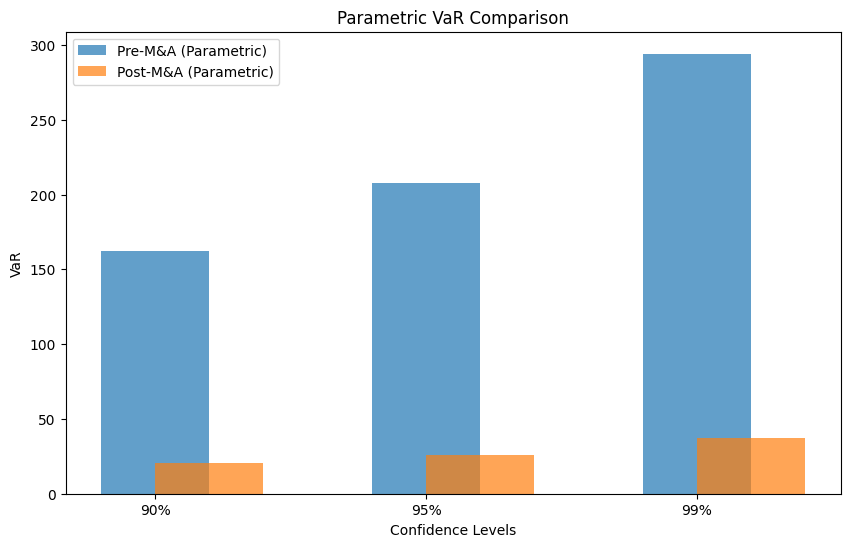

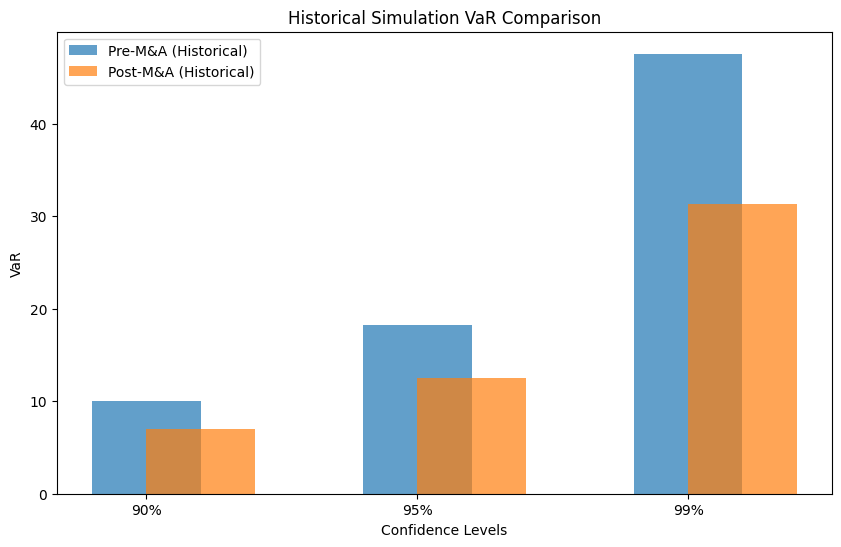

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
labels = ['90%', '95%', '99%']
pre_mna_parametric = list(pre_mna_var_cleaned.values())
post_mna_parametric = list(post_mna_var_cleaned.values())
pre_mna_historical = list(pre_mna_historical_var.values())
post_mna_historical = list(post_mna_historical_var.values())

# Plot Parametric VaR
plt.figure(figsize=(10, 6))
plt.bar(labels, pre_mna_parametric, alpha=0.7, label='Pre-M&A (Parametric)', width=0.4, align='center')
plt.bar(labels, post_mna_parametric, alpha=0.7, label='Post-M&A (Parametric)', width=0.4, align='edge')
plt.title('Parametric VaR Comparison')
plt.xlabel('Confidence Levels')
plt.ylabel('VaR')
plt.legend()
plt.show()

# Plot Historical Simulation VaR
plt.figure(figsize=(10, 6))
plt.bar(labels, pre_mna_historical, alpha=0.7, label='Pre-M&A (Historical)', width=0.4, align='center')
plt.bar(labels, post_mna_historical, alpha=0.7, label='Post-M&A (Historical)', width=0.4, align='edge')
plt.title('Historical Simulation VaR Comparison')
plt.xlabel('Confidence Levels')
plt.ylabel('VaR')
plt.legend()
plt.show()


The visualizations above compare the Value at Risk (VaR) between pre-M&A and post-M&A periods using:

Parametric VaR: Displays a significant drop in risk post-M&A.
Historical Simulation VaR: Similarly, shows reduced risk post-M&A at all confidence levels.
These results indicate that the acquiring firms' stock risk decreases after the M&A event.

Implement Monte Carlo VaR

In [ ]:
# Function to calculate Monte Carlo VaR
def calculate_monte_carlo_var(mean_return, std_dev, confidence_levels, time_horizon, num_simulations=10000):
    # Generate random returns based on normal distribution
    random_returns = np.random.normal(loc=mean_return, scale=std_dev, size=num_simulations)

    # Scale returns for the time horizon (if >1 day)
    scaled_returns = random_returns * np.sqrt(time_horizon)

    # Sort the simulated returns
    sorted_returns = np.sort(scaled_returns)

    # Calculate VaR for each confidence level
    var_results = {}
    for confidence in confidence_levels:
        # Find the loss percentile (e.g., 5th percentile for 95% confidence)
        percentile = (1 - confidence) * 100
        var = -np.percentile(sorted_returns, percentile)
        var_results[f"VaR {int(confidence * 100)}%"] = var

    return var_results

# Extract mean and standard deviation of returns for pre-M&A and post-M&A periods
pre_mna_mean = pre_mna_returns_cleaned.mean()
pre_mna_std = pre_mna_returns_cleaned.std()
post_mna_mean = post_mna_returns_cleaned.mean()
post_mna_std = post_mna_returns_cleaned.std()

# Monte Carlo VaR for pre and post M&A
pre_mna_monte_carlo_var = calculate_monte_carlo_var(pre_mna_mean, pre_mna_std, confidence_levels, time_horizon)
post_mna_monte_carlo_var = calculate_monte_carlo_var(post_mna_mean, post_mna_std, confidence_levels, time_horizon)

# Display results
pre_mna_monte_carlo_var, post_mna_monte_carlo_var


({'VaR 90%': 158.11762726948433,
  'VaR 95%': 204.87282255877068,
  'VaR 99%': 298.0908914881829},
 {'VaR 90%': 19.37676019983576,
  'VaR 95%': 25.449519949836905,
  'VaR 99%': 37.14547839384407})

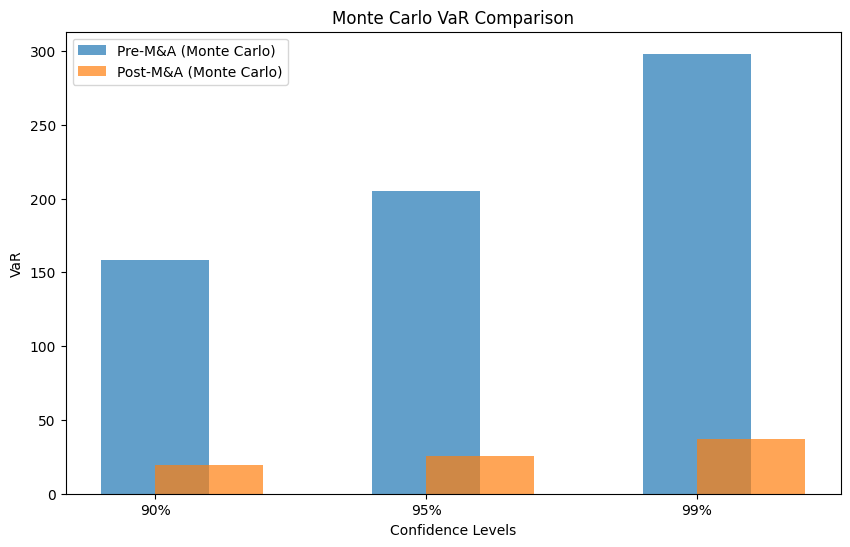

In [ ]:
# Data for visualization
labels = ['90%', '95%', '99%']
pre_mna_mc = list(pre_mna_monte_carlo_var.values())
post_mna_mc = list(post_mna_monte_carlo_var.values())

# Plot Monte Carlo VaR
plt.figure(figsize=(10, 6))
plt.bar(labels, pre_mna_mc, alpha=0.7, label='Pre-M&A (Monte Carlo)', width=0.4, align='center')
plt.bar(labels, post_mna_mc, alpha=0.7, label='Post-M&A (Monte Carlo)', width=0.4, align='edge')
plt.title('Monte Carlo VaR Comparison')
plt.xlabel('Confidence Levels')
plt.ylabel('VaR')
plt.legend()
plt.show()


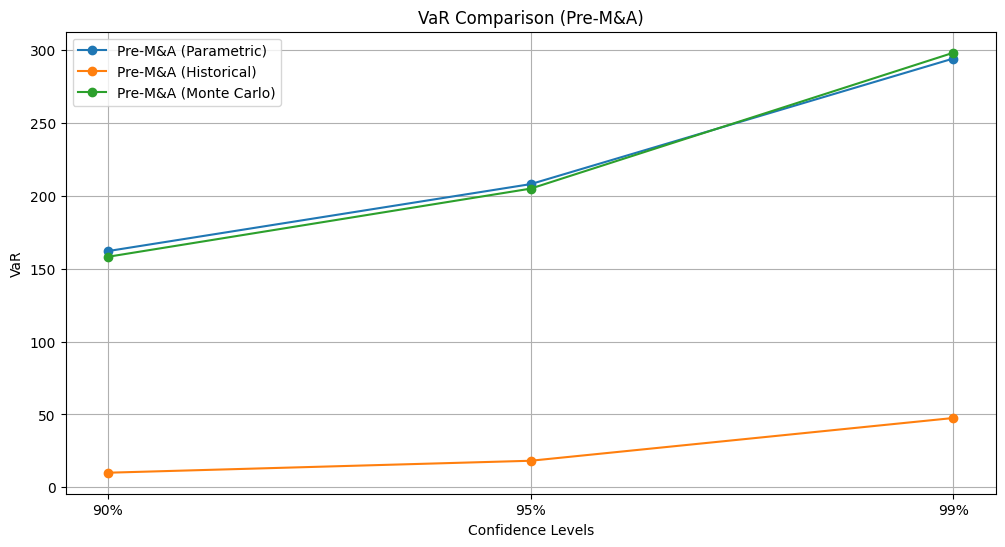

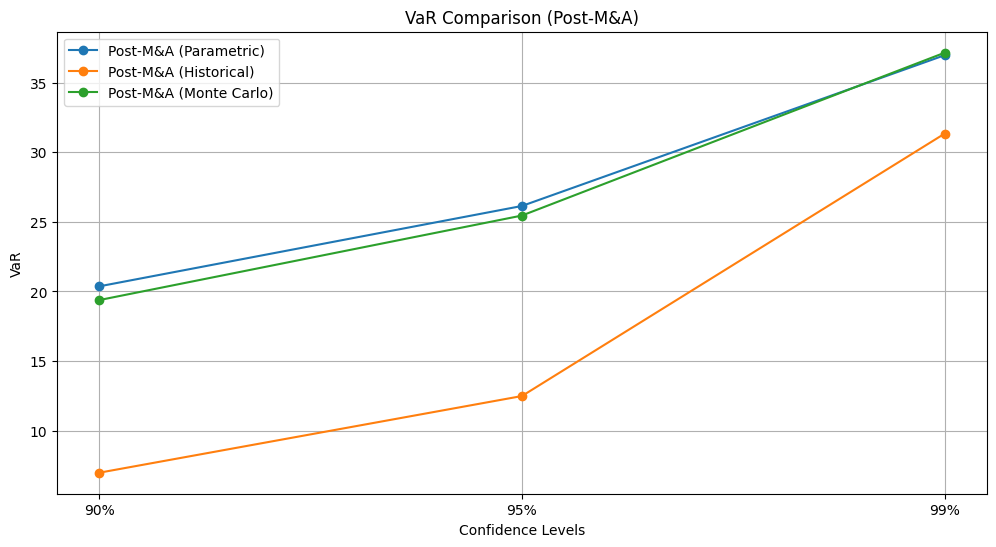

In [ ]:
# Data for visualization (all three methods)
methods = ['Parametric', 'Historical', 'Monte Carlo']
confidence_levels = ['90%', '95%', '99%']

# Pre-M&A results
pre_mna_results = [
    list(pre_mna_var_cleaned.values()),       # Parametric
    list(pre_mna_historical_var.values()),    # Historical
    list(pre_mna_monte_carlo_var.values())    # Monte Carlo
]

# Post-M&A results
post_mna_results = [
    list(post_mna_var_cleaned.values()),      # Parametric
    list(post_mna_historical_var.values()),   # Historical
    list(post_mna_monte_carlo_var.values())   # Monte Carlo
]

# Visualization for Pre-M&A
plt.figure(figsize=(12, 6))
for i, method in enumerate(methods):
    plt.plot(confidence_levels, pre_mna_results[i], marker='o', label=f'Pre-M&A ({method})')

plt.title('VaR Comparison (Pre-M&A)')
plt.xlabel('Confidence Levels')
plt.ylabel('VaR')
plt.legend()
plt.grid()
plt.show()

# Visualization for Post-M&A
plt.figure(figsize=(12, 6))
for i, method in enumerate(methods):
    plt.plot(confidence_levels, post_mna_results[i], marker='o', label=f'Post-M&A ({method})')

plt.title('VaR Comparison (Post-M&A)')
plt.xlabel('Confidence Levels')
plt.ylabel('VaR')
plt.legend()
plt.grid()
plt.show()


backtesting for model validation.

In [ ]:
# Function to perform backtesting
def backtest_var(returns, var_results, confidence_levels):
    backtesting_results = {}

    # For each confidence level, count exceptions (losses exceeding VaR)
    for confidence, var in var_results.items():
        # Extract actual losses (negative returns)
        actual_losses = -returns

        # Count exceptions
        exceptions = actual_losses[actual_losses > var].count()
        total_observations = len(returns)
        exception_rate = exceptions / total_observations

        # Add to results
        backtesting_results[confidence] = {
            "VaR": var,
            "Exceptions": exceptions,
            "Total Observations": total_observations,
            "Exception Rate": exception_rate
        }

    return backtesting_results

# Backtest Parametric VaR for pre-M&A and post-M&A
pre_mna_backtest_parametric = backtest_var(pre_mna_returns_cleaned, pre_mna_var_cleaned, confidence_levels)
post_mna_backtest_parametric = backtest_var(post_mna_returns_cleaned, post_mna_var_cleaned, confidence_levels)

# Backtest Historical VaR for pre-M&A and post-M&A
pre_mna_backtest_historical = backtest_var(pre_mna_returns_cleaned, pre_mna_historical_var, confidence_levels)
post_mna_backtest_historical = backtest_var(post_mna_returns_cleaned, post_mna_historical_var, confidence_levels)

# Backtest Monte Carlo VaR for pre-M&A and post-M&A
pre_mna_backtest_mc = backtest_var(pre_mna_returns_cleaned, pre_mna_monte_carlo_var, confidence_levels)
post_mna_backtest_mc = backtest_var(post_mna_returns_cleaned, post_mna_monte_carlo_var, confidence_levels)

# Display results for Parametric VaR backtesting
import pandas as pd

pre_mna_parametric_df = pd.DataFrame(pre_mna_backtest_parametric).T
post_mna_parametric_df = pd.DataFrame(post_mna_backtest_parametric).T

pre_mna_parametric_df, post_mna_parametric_df


(                VaR  Exceptions  Total Observations  Exception Rate
 VaR 90%  162.027925         0.0             22776.0             0.0
 VaR 95%  207.960590         0.0             22776.0             0.0
 VaR 99%  294.122632         0.0             22776.0             0.0,
                VaR  Exceptions  Total Observations  Exception Rate
 VaR 90%  20.364155      1029.0             44429.0        0.023161
 VaR 95%  26.137110       655.0             44429.0        0.014743
 VaR 99%  36.966213       333.0             44429.0        0.007495)

In [ ]:
# Create dataframes for Historical and Monte Carlo backtesting results
pre_mna_historical_df = pd.DataFrame(pre_mna_backtest_historical).T
post_mna_historical_df = pd.DataFrame(post_mna_backtest_historical).T

pre_mna_mc_df = pd.DataFrame(pre_mna_backtest_mc).T
post_mna_mc_df = pd.DataFrame(post_mna_backtest_mc).T

# Display results for Historical and Monte Carlo VaR backtesting
(pre_mna_historical_df, post_mna_historical_df), (pre_mna_mc_df, post_mna_mc_df)


((               VaR  Exceptions  Total Observations  Exception Rate
  VaR 90%  10.000000      2242.0             22776.0        0.098437
  VaR 95%  18.209865      1139.0             22776.0        0.050009
  VaR 99%  47.540984       227.0             22776.0        0.009967,
                 VaR  Exceptions  Total Observations  Exception Rate
  VaR 90%   6.976744      4435.0             44429.0        0.099822
  VaR 95%  12.484772      2222.0             44429.0        0.050012
  VaR 99%  31.333831       445.0             44429.0        0.010016),
 (                VaR  Exceptions  Total Observations  Exception Rate
  VaR 90%  158.117627         0.0             22776.0             0.0
  VaR 95%  204.872823         0.0             22776.0             0.0
  VaR 99%  298.090891         0.0             22776.0             0.0,
                 VaR  Exceptions  Total Observations  Exception Rate
  VaR 90%  19.376760      1114.0             44429.0        0.025074
  VaR 95%  25.449520      

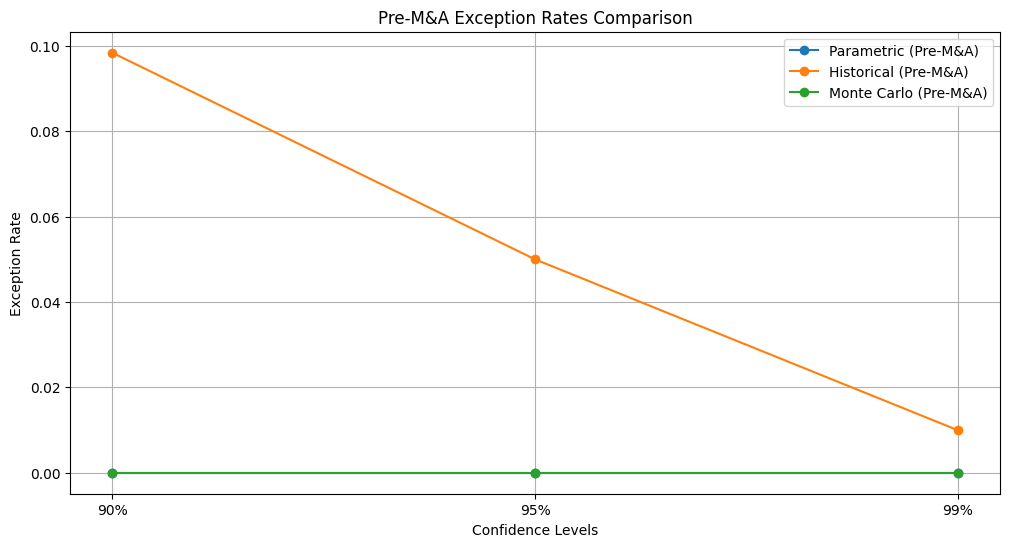

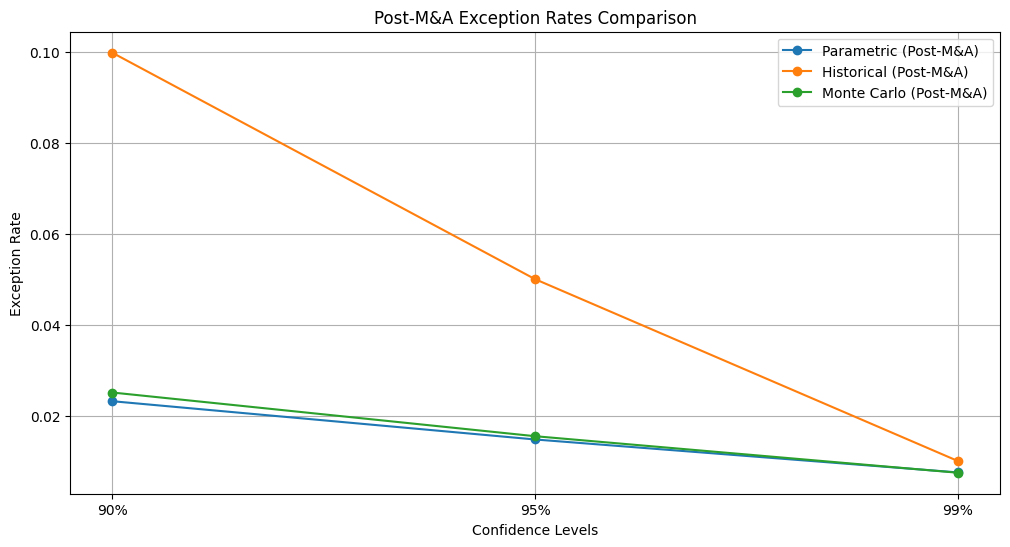

In [ ]:
# Prepare data for visualization: Exception rates comparison
confidence_labels = ['90%', '95%', '99%']

# Pre-M&A Exception Rates
pre_mna_exception_rates = {
    "Parametric": pre_mna_parametric_df["Exception Rate"].values,
    "Historical": pre_mna_historical_df["Exception Rate"].values,
    "Monte Carlo": pre_mna_mc_df["Exception Rate"].values
}

# Post-M&A Exception Rates
post_mna_exception_rates = {
    "Parametric": post_mna_parametric_df["Exception Rate"].values,
    "Historical": post_mna_historical_df["Exception Rate"].values,
    "Monte Carlo": post_mna_mc_df["Exception Rate"].values
}

# Visualization for Pre-M&A Exception Rates
plt.figure(figsize=(12, 6))
for method, rates in pre_mna_exception_rates.items():
    plt.plot(confidence_labels, rates, marker='o', label=f'{method} (Pre-M&A)')
plt.title('Pre-M&A Exception Rates Comparison')
plt.xlabel('Confidence Levels')
plt.ylabel('Exception Rate')
plt.legend()
plt.grid()
plt.show()

# Visualization for Post-M&A Exception Rates
plt.figure(figsize=(12, 6))
for method, rates in post_mna_exception_rates.items():
    plt.plot(confidence_labels, rates, marker='o', label=f'{method} (Post-M&A)')
plt.title('Post-M&A Exception Rates Comparison')
plt.xlabel('Confidence Levels')
plt.ylabel('Exception Rate')
plt.legend()
plt.grid()
plt.show()


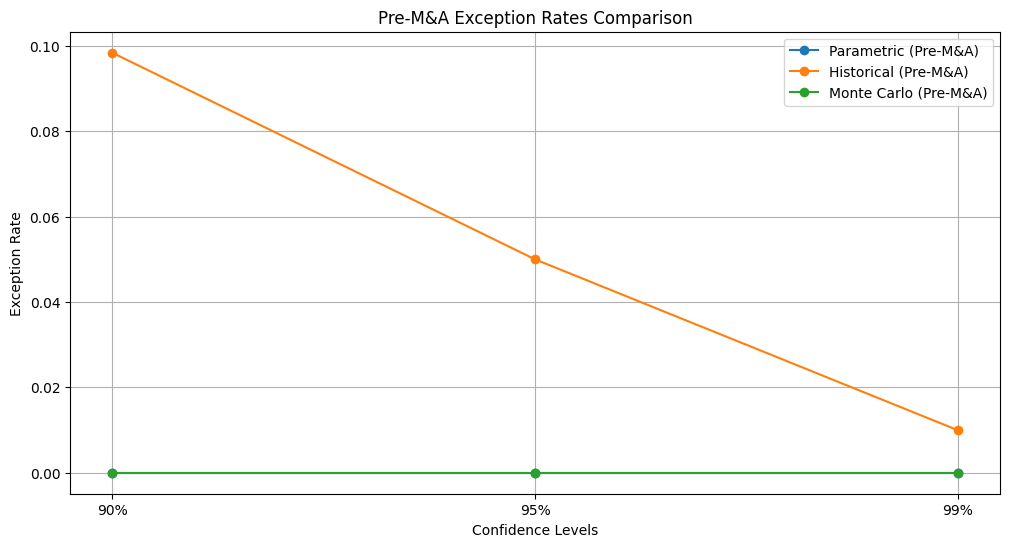

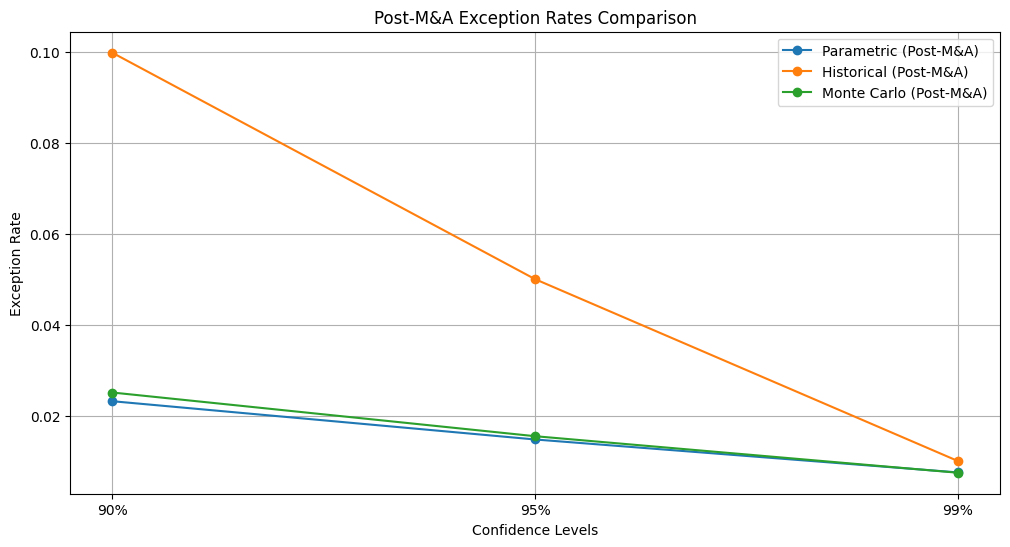

In [ ]:
# Prepare data for visualization: Exception rates comparison
confidence_labels = ['90%', '95%', '99%']

# Pre-M&A Exception Rates
pre_mna_exception_rates = {
    "Parametric": pre_mna_parametric_df["Exception Rate"].values,
    "Historical": pre_mna_historical_df["Exception Rate"].values,
    "Monte Carlo": pre_mna_mc_df["Exception Rate"].values
}

# Post-M&A Exception Rates
post_mna_exception_rates = {
    "Parametric": post_mna_parametric_df["Exception Rate"].values,
    "Historical": post_mna_historical_df["Exception Rate"].values,
    "Monte Carlo": post_mna_mc_df["Exception Rate"].values
}

# Visualization for Pre-M&A Exception Rates
plt.figure(figsize=(12, 6))
for method, rates in pre_mna_exception_rates.items():
    plt.plot(confidence_labels, rates, marker='o', label=f'{method} (Pre-M&A)')
plt.title('Pre-M&A Exception Rates Comparison')
plt.xlabel('Confidence Levels')
plt.ylabel('Exception Rate')
plt.legend()
plt.grid()
plt.show()

# Visualization for Post-M&A Exception Rates
plt.figure(figsize=(12, 6))
for method, rates in post_mna_exception_rates.items():
    plt.plot(confidence_labels, rates, marker='o', label=f'{method} (Post-M&A)')
plt.title('Post-M&A Exception Rates Comparison')
plt.xlabel('Confidence Levels')
plt.ylabel('Exception Rate')
plt.legend()
plt.grid()
plt.show()


prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
data = pd.read_csv('/content/merged datacalculate MV,return.csv')

# Convert Trade Date to datetime
data['Trade Date'] = pd.to_datetime(data['Trade Date'], errors='coerce')

# Initialize lists to collect results
results = []

# Group data by Acquirer Name
grouped_data = data.groupby('Acquirer Name')

# Iterate over each company
for company, group in grouped_data:
    print(f"Processing {company}...")

    # Feature Engineering for the company
    group = group.copy()
    group['Rolling Volatility'] = group['Daily Return'].rolling(window=20).std()
    group['Lagged Return 1'] = group['Daily Return'].shift(1)
    group['Lagged Return 5'] = group['Daily Return'].shift(5)

    # Drop rows with NaN values
    group.dropna(inplace=True)

    # Split into pre-M&A and post-M&A
    pre_mna_data = group[group['Period'] == 'Pre-M&A']
    post_mna_data = group[group['Period'] == 'Post-M&A']

    # Check if both pre-M&A and post-M&A data exist for the company
    if pre_mna_data.empty or post_mna_data.empty:
        print(f"Skipping {company} due to insufficient data.")
        continue

    # Define features and target
    features = ['MA_20', 'MA_50', 'MA_200', 'Relative Day', 'Rolling Volatility', 'Lagged Return 1', 'Lagged Return 5']
    target = 'Daily Return'

    X_train = pre_mna_data[features]
    y_train = pre_mna_data[target]
    X_test = post_mna_data[features]
    y_test = post_mna_data[target]

    # Initialize Gradient Boosting model
    xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = xgb_model.predict(X_train)
    y_pred_test = xgb_model.predict(X_test)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # Store results
    results.append({
        "Company": company,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R²": train_r2,
        "Test R²": test_r2
    })

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


Processing ACL Cables PLC...
Processing Aitken Spence Hotel Holdings PLC...
Processing Asiri Hospitals Holdings PLC...
Processing Cargills Ceylon PLC...
Processing Carson Cumberbatch & Co PLC...
Processing Citrus Leisure PLC...
Processing Dialog Axiata PLC...
Processing Distilleries Co of Sri Lanka PLC...
Processing Expolanka Holdings PLC...
Skipping Expolanka Holdings PLC due to insufficient data.
Processing Hayleys PLC...
Processing Hemas Holdings PLC...
Processing John Keells Holdings PLC...
Processing Kelani Valley Plantations PLC...
Processing National Development Bank PLC...
Processing Nations Trust Bank PLC...
Processing People's Merchant Finance PLC...
Processing Vallibel Power Erathna PLC...
                             Company   Train MSE     Test MSE  Train MAE  \
0                     ACL Cables PLC   80.258707   423.580034   5.073467   
1   Aitken Spence Hotel Holdings PLC   33.939821   620.789737   3.867716   
2       Asiri Hospitals Holdings PLC   29.900716    90.383231 

Processing ACL Cables PLC...


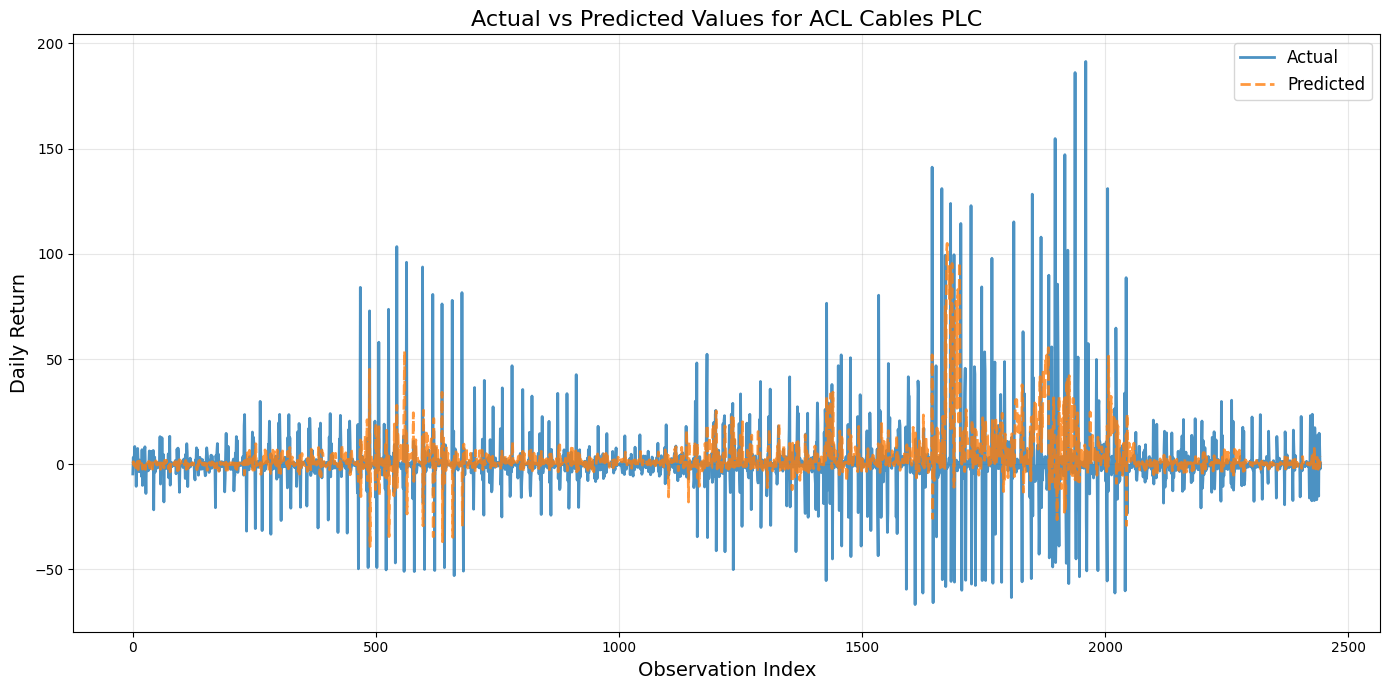

Processing Aitken Spence Hotel Holdings PLC...


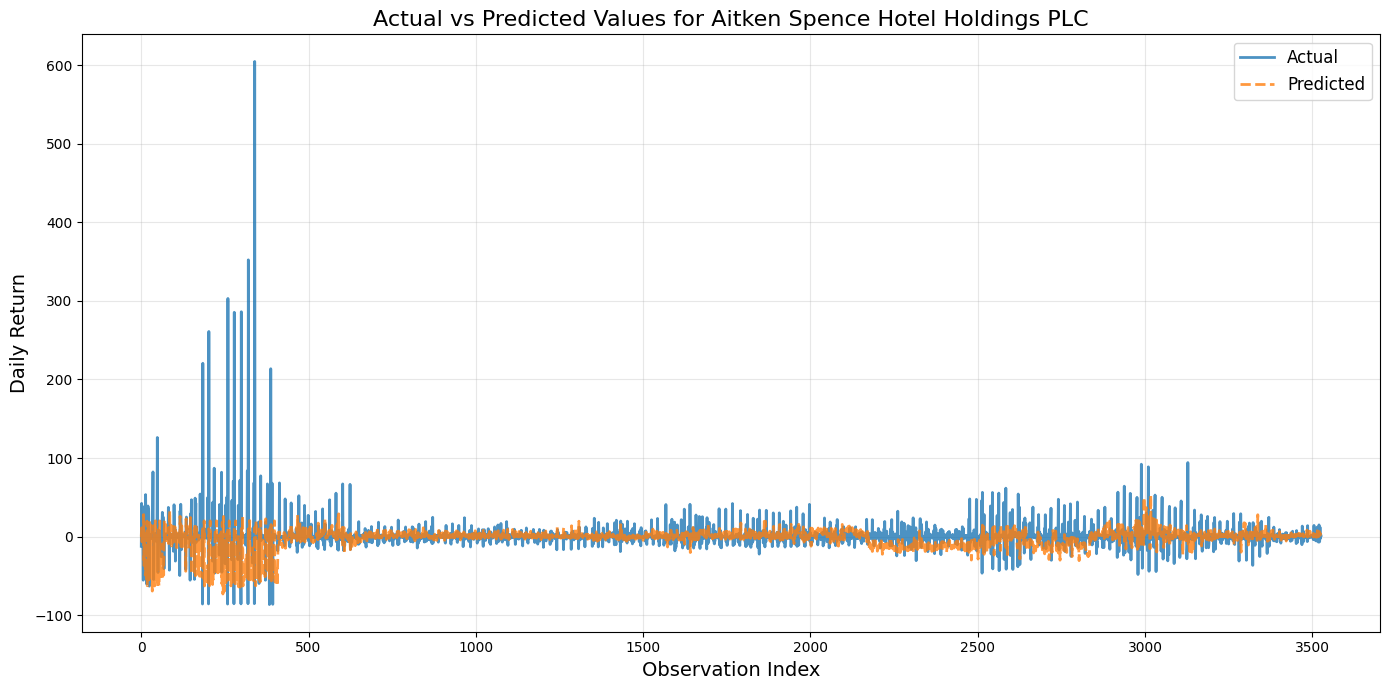

Processing Asiri Hospitals Holdings PLC...


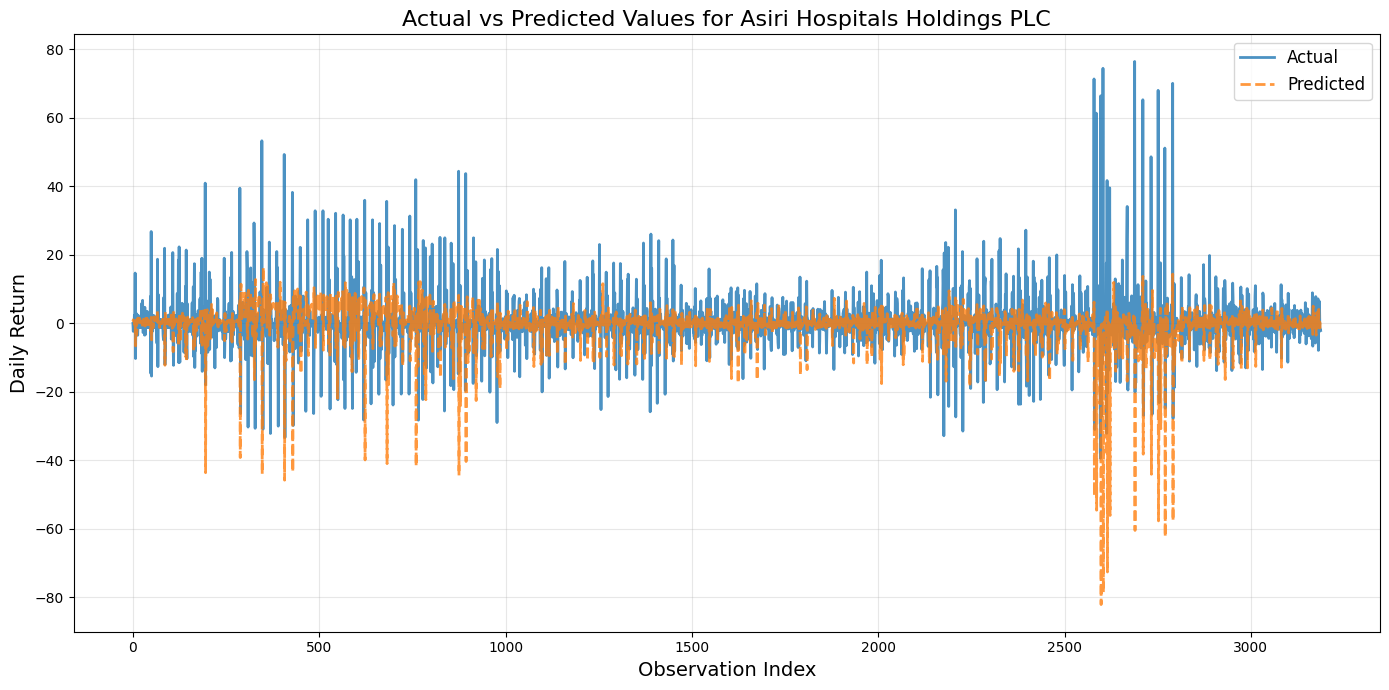

Processing Cargills Ceylon PLC...


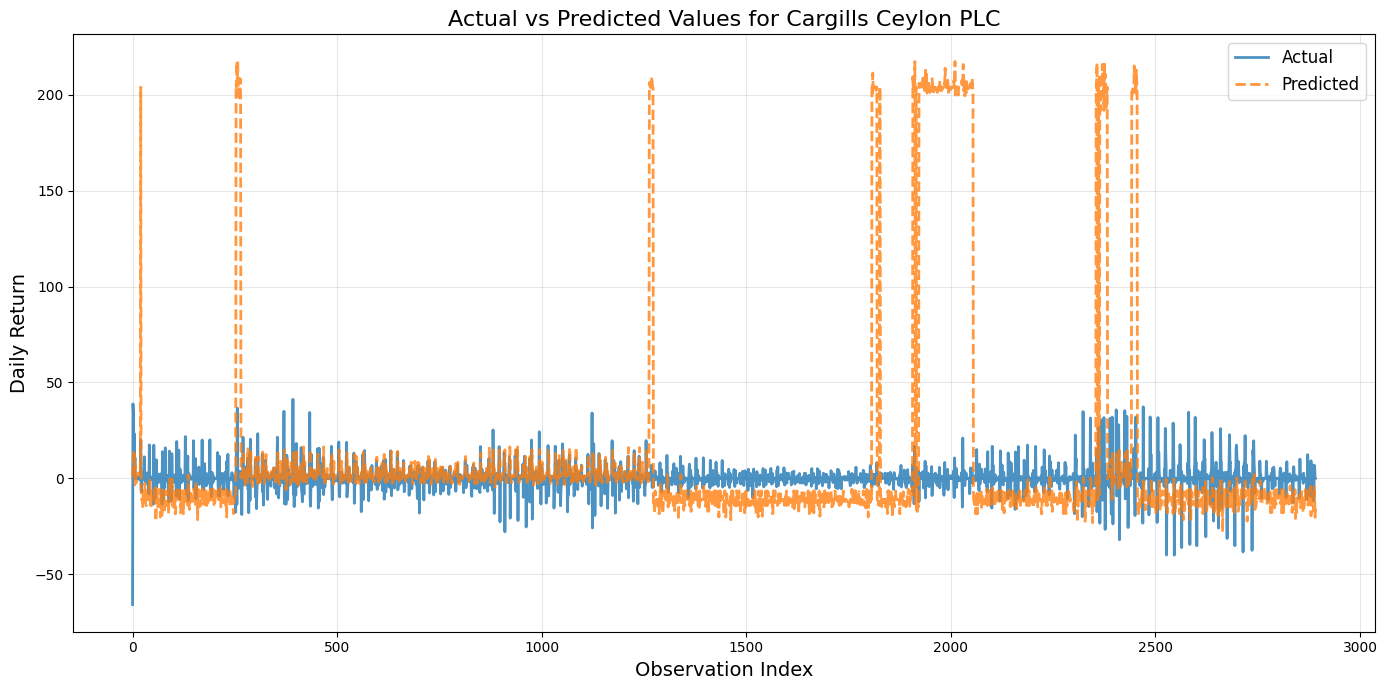

Processing Carson Cumberbatch & Co PLC...


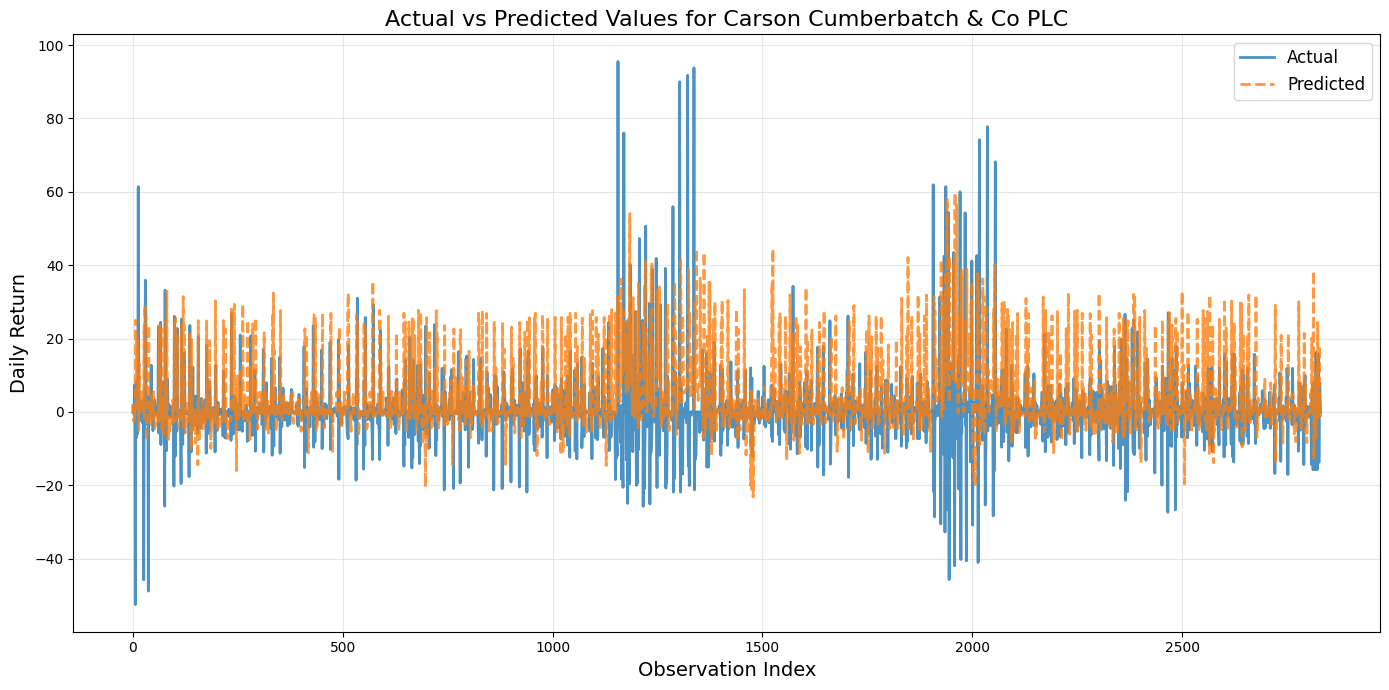

Processing Citrus Leisure PLC...


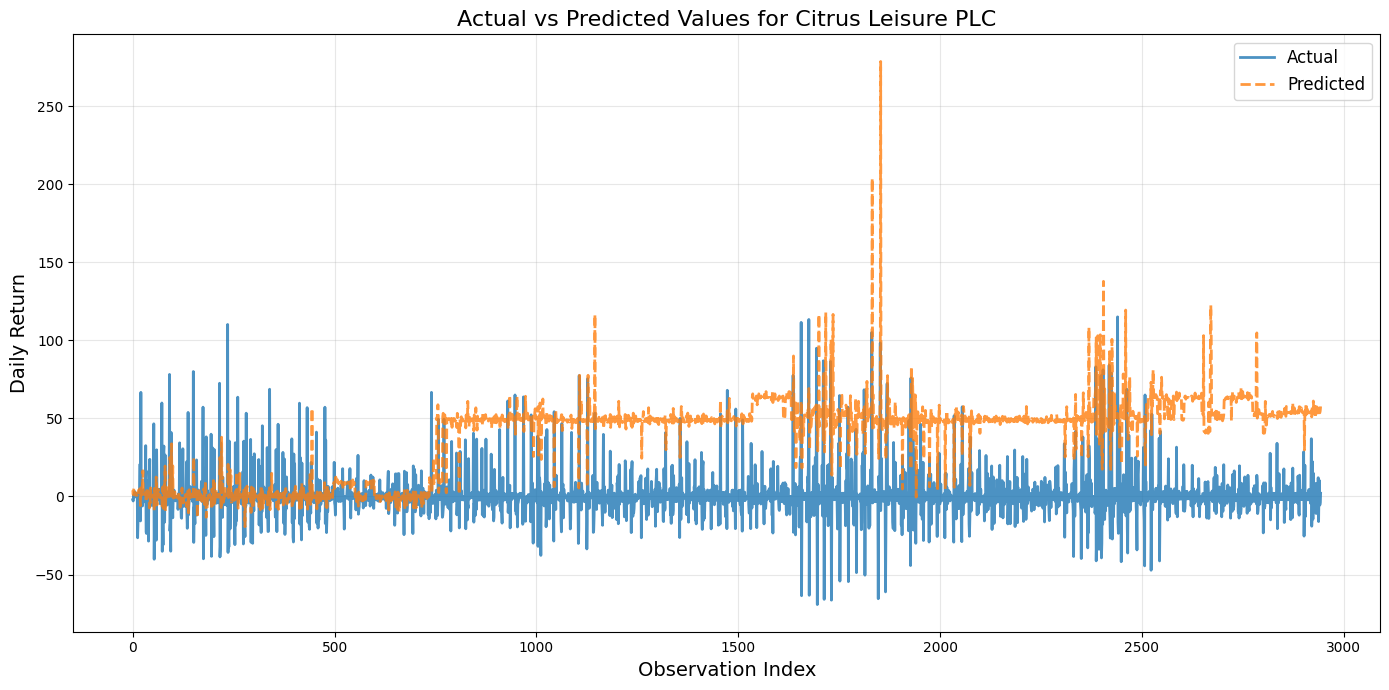

Processing Dialog Axiata PLC...


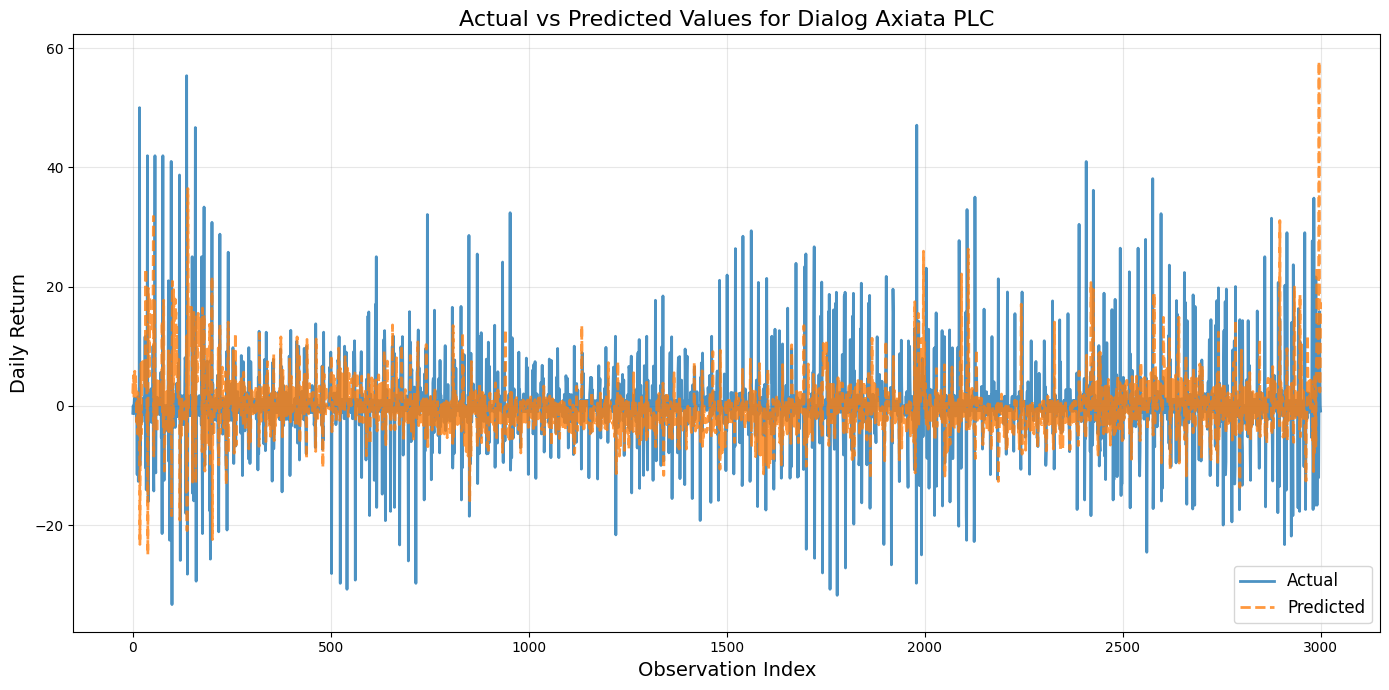

Processing Distilleries Co of Sri Lanka PLC...


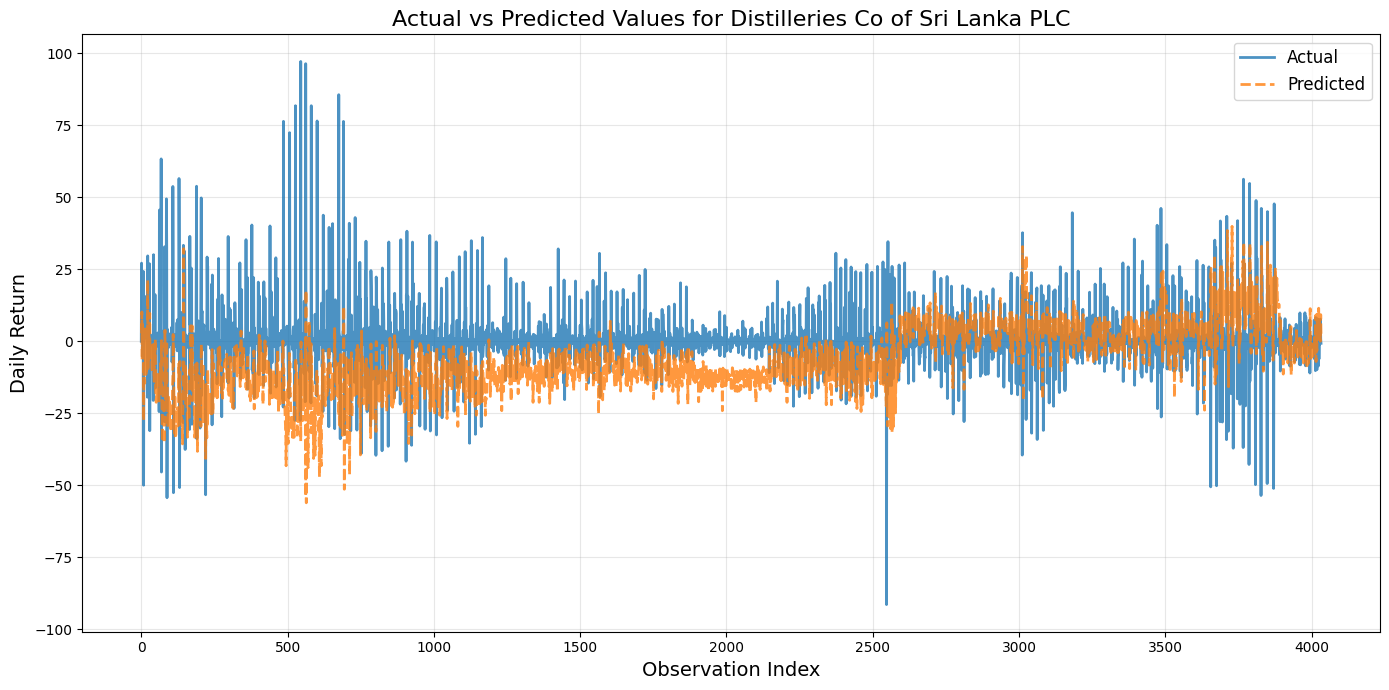

Processing Expolanka Holdings PLC...
Skipping Expolanka Holdings PLC due to insufficient data.
Processing Hayleys PLC...


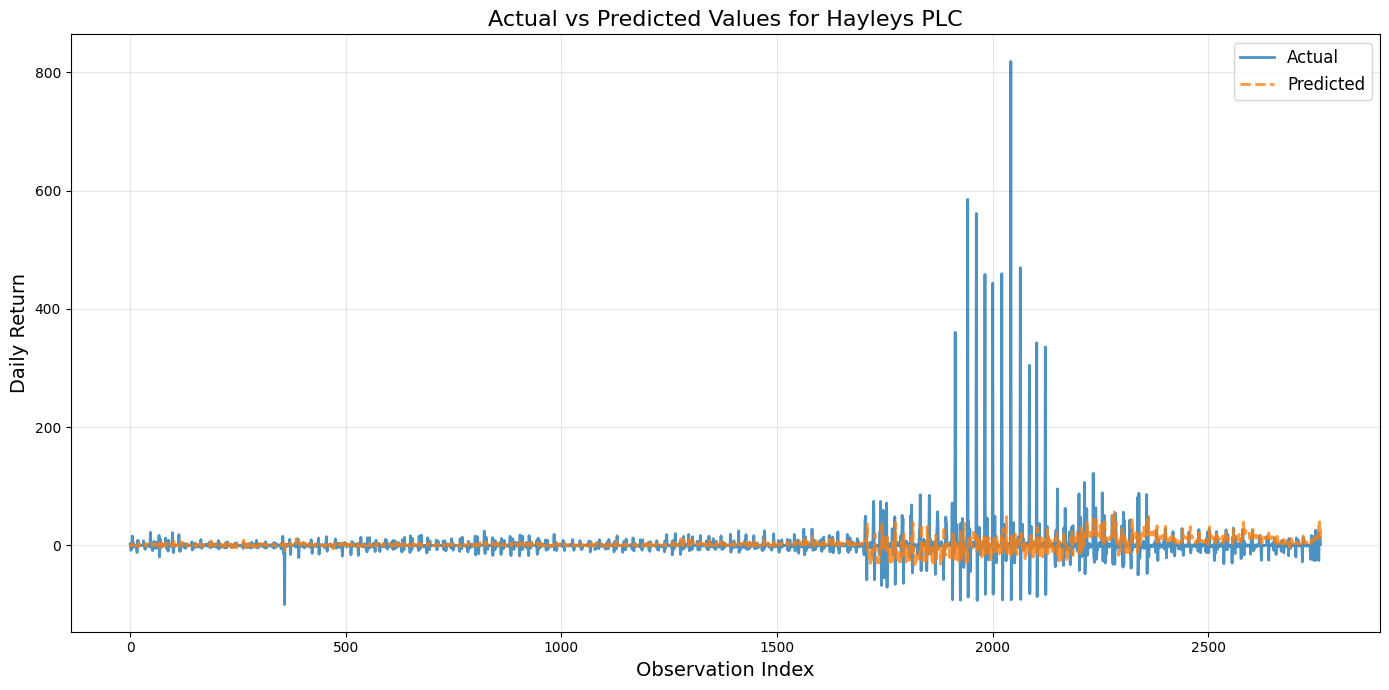

Processing Hemas Holdings PLC...


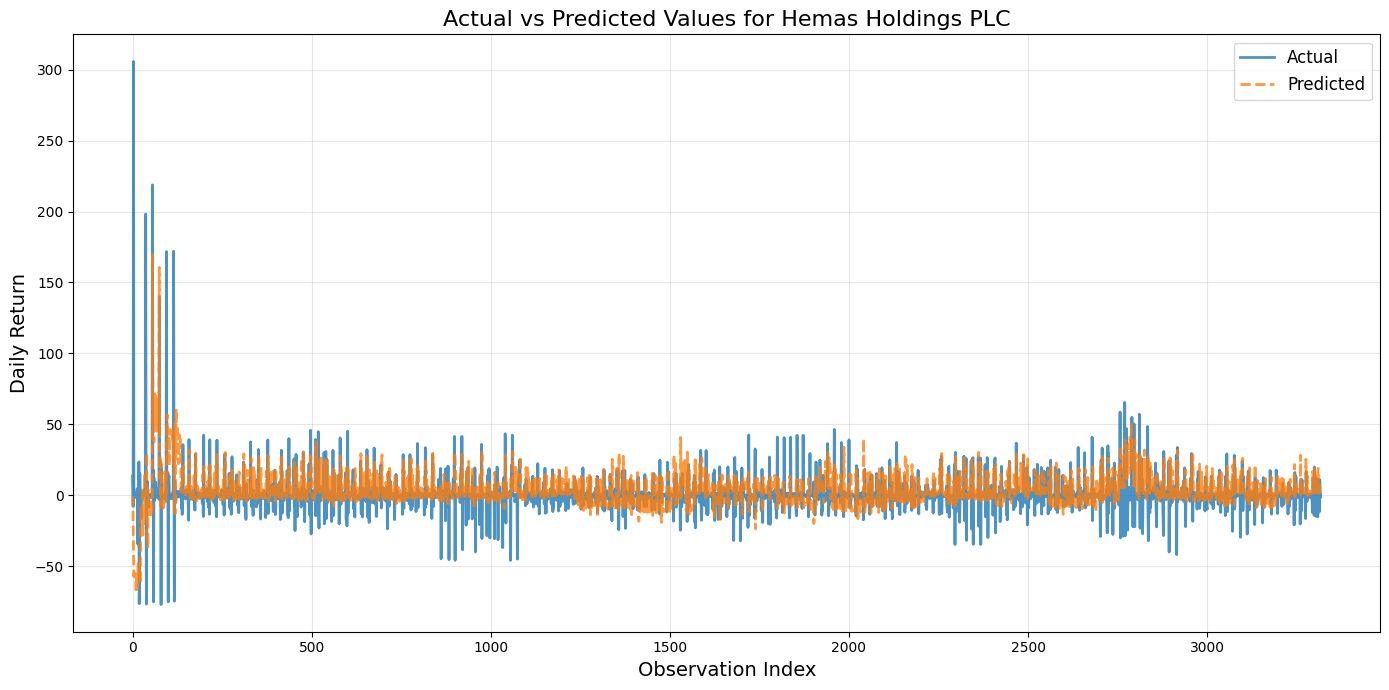

Processing John Keells Holdings PLC...


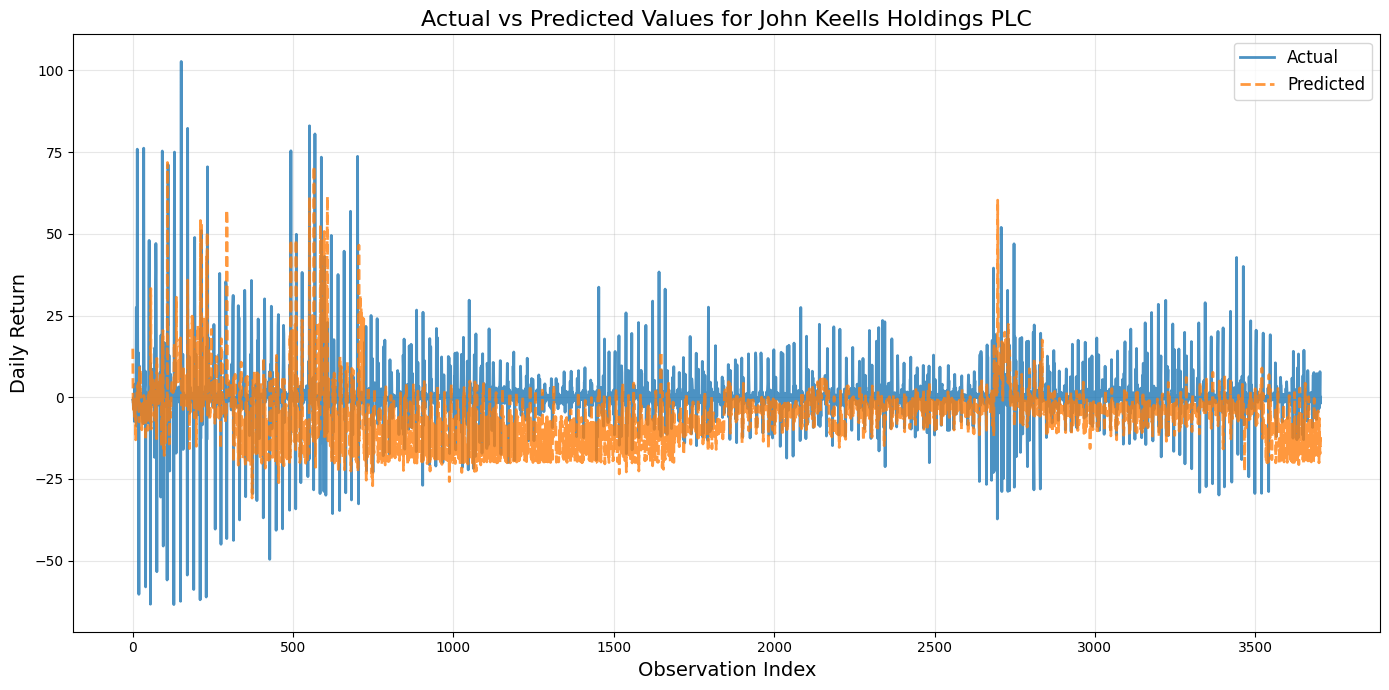

Processing Kelani Valley Plantations PLC...


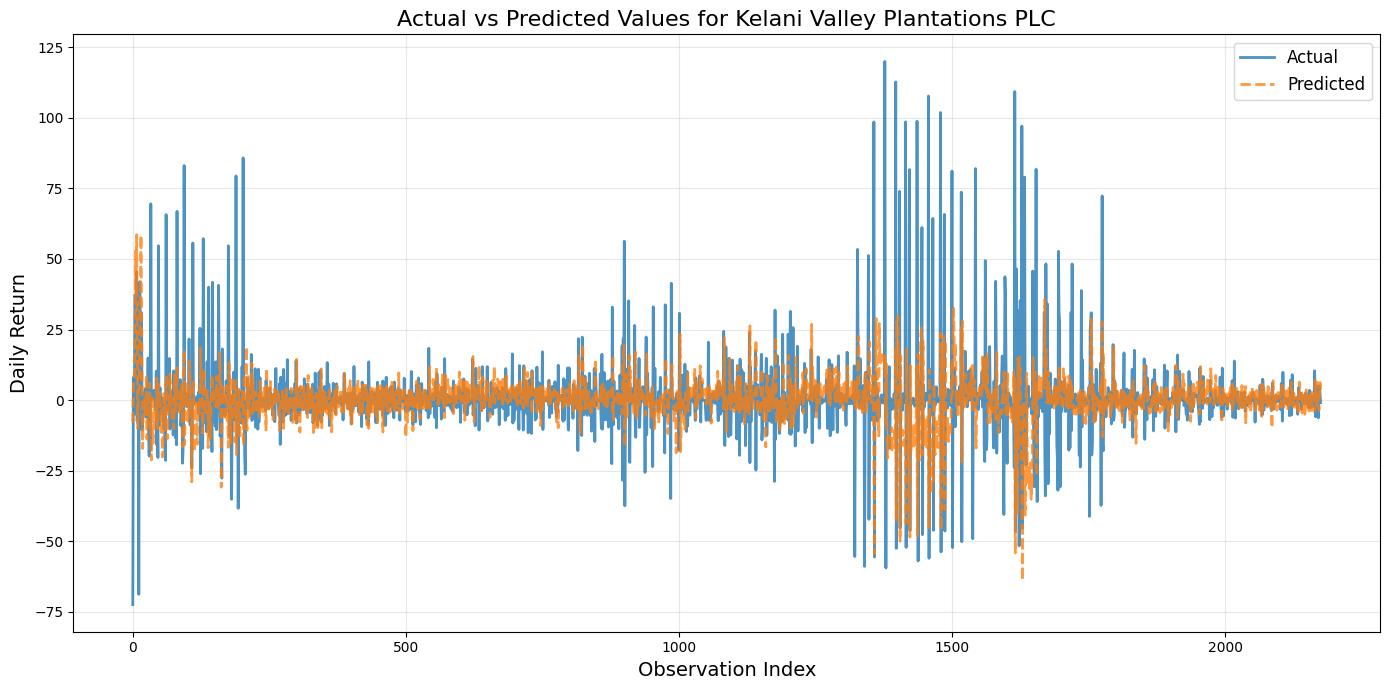

Processing National Development Bank PLC...


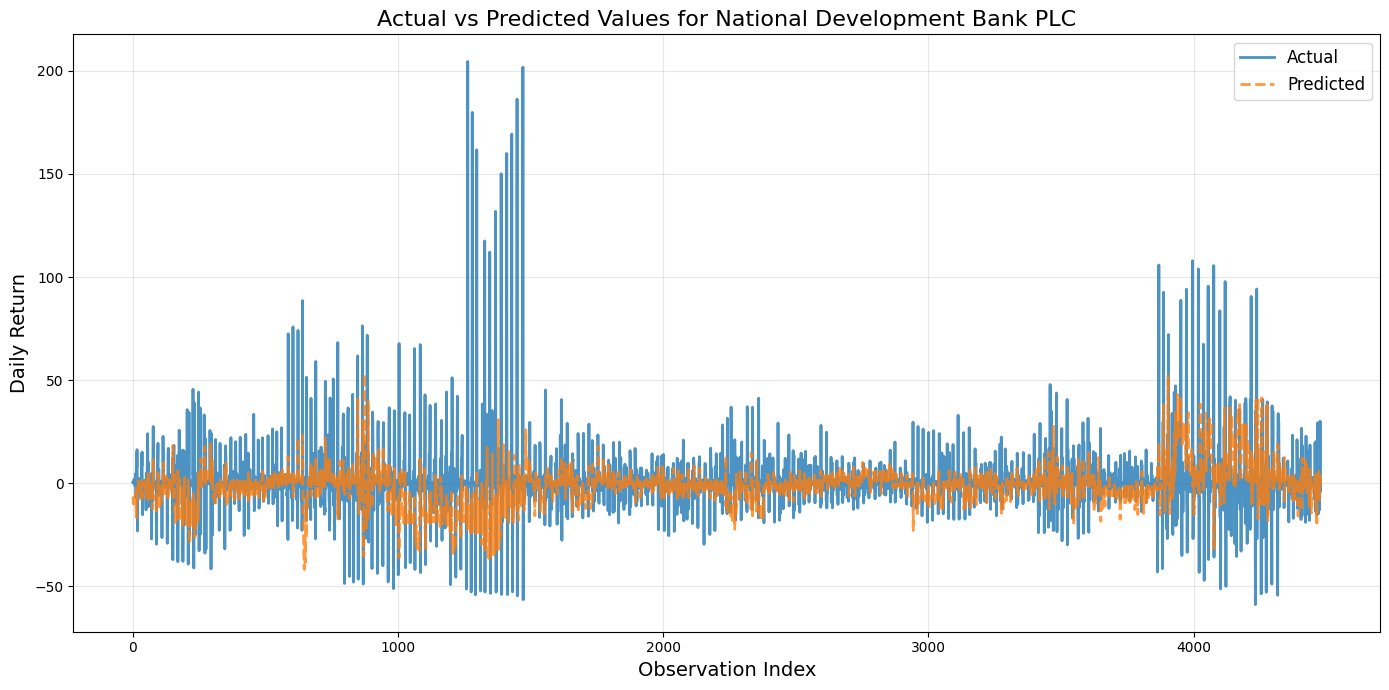

Processing Nations Trust Bank PLC...


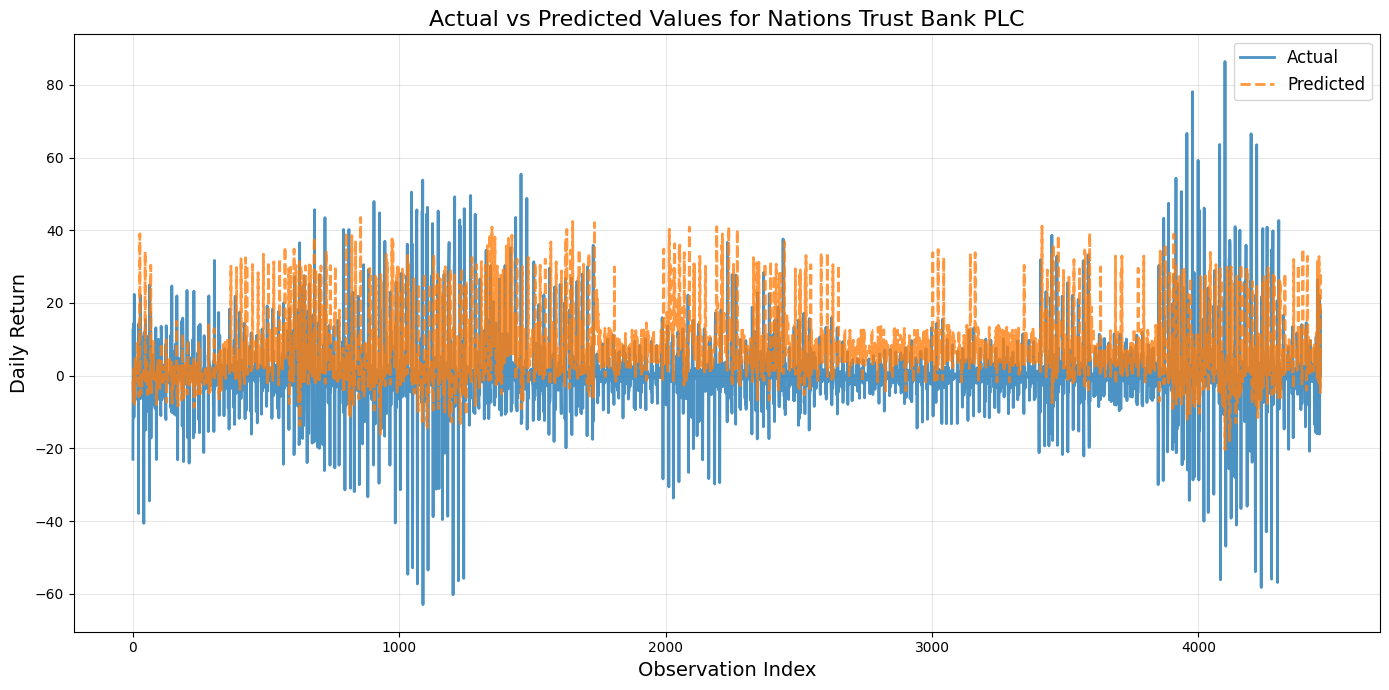

Processing People's Merchant Finance PLC...


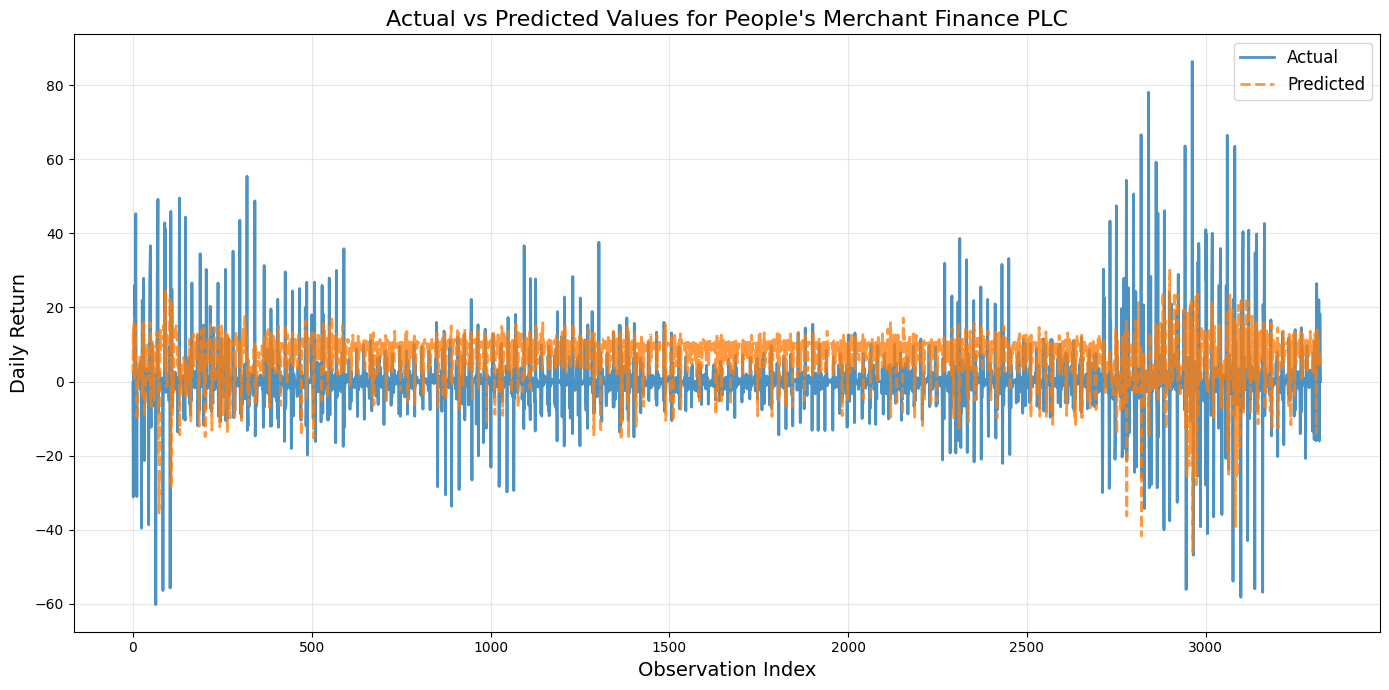

Processing Vallibel Power Erathna PLC...


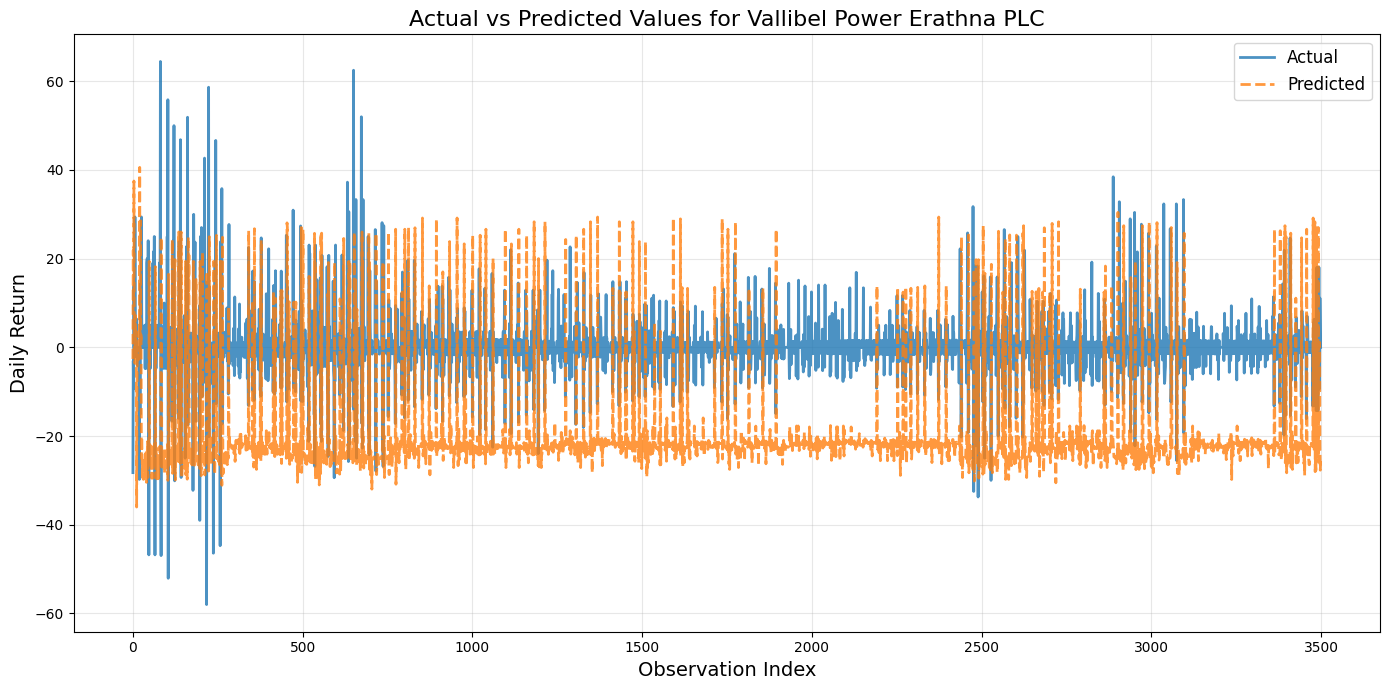

Model Performance Metrics:
                             Company   Train MSE     Test MSE  Train MAE  \
0                     ACL Cables PLC   80.258707   423.580034   5.073467   
1   Aitken Spence Hotel Holdings PLC   33.939821   620.789737   3.867716   
2       Asiri Hospitals Holdings PLC   29.900716    90.383231   3.420993   
3                Cargills Ceylon PLC  635.750378  3238.847527  12.596162   
4        Carson Cumberbatch & Co PLC  123.042629   183.824202   6.521812   
5                 Citrus Leisure PLC  362.609702  2255.007271  10.223112   
6                  Dialog Axiata PLC   35.741298    72.382277   3.498806   
7   Distilleries Co of Sri Lanka PLC   29.840087   265.709722   3.453816   
8                        Hayleys PLC   28.604926  1246.651216   3.246894   
9                 Hemas Holdings PLC   24.006898   314.163991   3.040100   
10          John Keells Holdings PLC   31.380334   199.003005   3.381341   
11     Kelani Valley Plantations PLC   39.181147   248.738616

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Load the dataset
data = pd.read_csv('/content/merged datacalculate MV,return.csv')

# Convert Trade Date to datetime
data['Trade Date'] = pd.to_datetime(data['Trade Date'], errors='coerce')

# Initialize lists to collect results
results = []

# Group data by Acquirer Name
grouped_data = data.groupby('Acquirer Name')

# Iterate over each company
for company, group in grouped_data:
    print(f"Processing {company}...")

    # Feature Engineering for the company
    group = group.copy()
    group['Rolling Volatility'] = group['Daily Return'].rolling(window=20).std()
    group['Lagged Return 1'] = group['Daily Return'].shift(1)
    group['Lagged Return 5'] = group['Daily Return'].shift(5)

    # Drop rows with NaN values
    group.dropna(inplace=True)

    # Split into pre-M&A and post-M&A
    pre_mna_data = group[group['Period'] == 'Pre-M&A']
    post_mna_data = group[group['Period'] == 'Post-M&A']

    # Check if both pre-M&A and post-M&A data exist for the company
    if pre_mna_data.empty or post_mna_data.empty:
        print(f"Skipping {company} due to insufficient data.")
        continue

    # Define features and target
    features = ['MA_20', 'MA_50', 'MA_200', 'Relative Day', 'Rolling Volatility', 'Lagged Return 1', 'Lagged Return 5']
    target = 'Daily Return'

    X_train = pre_mna_data[features]
    y_train = pre_mna_data[target]
    X_test = post_mna_data[features]
    y_test = post_mna_data[target]

    # Initialize Gradient Boosting model
    xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = xgb_model.predict(X_train)
    y_pred_test = xgb_model.predict(X_test)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # Store results
    results.append({
        "Company": company,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R²": train_r2,
        "Test R²": test_r2
    })

    # Plot actual vs predicted values for the company
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.values, label="Actual", linewidth=2, alpha=0.8)
    plt.plot(y_pred_test, label="Predicted", linestyle="--", linewidth=2, alpha=0.8)
    plt.title(f"Actual vs Predicted Values for {company}", fontsize=16)
    plt.xlabel("Observation Index", fontsize=14)
    plt.ylabel("Daily Return", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

# Display the results
print("Model Performance Metrics:")
print(results_df)


compare LightGBM and XGBoost

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Processing ACL Cables PLC...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2477, number of used features: 7
[LightGBM] [Info] Start training from score 1.366990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

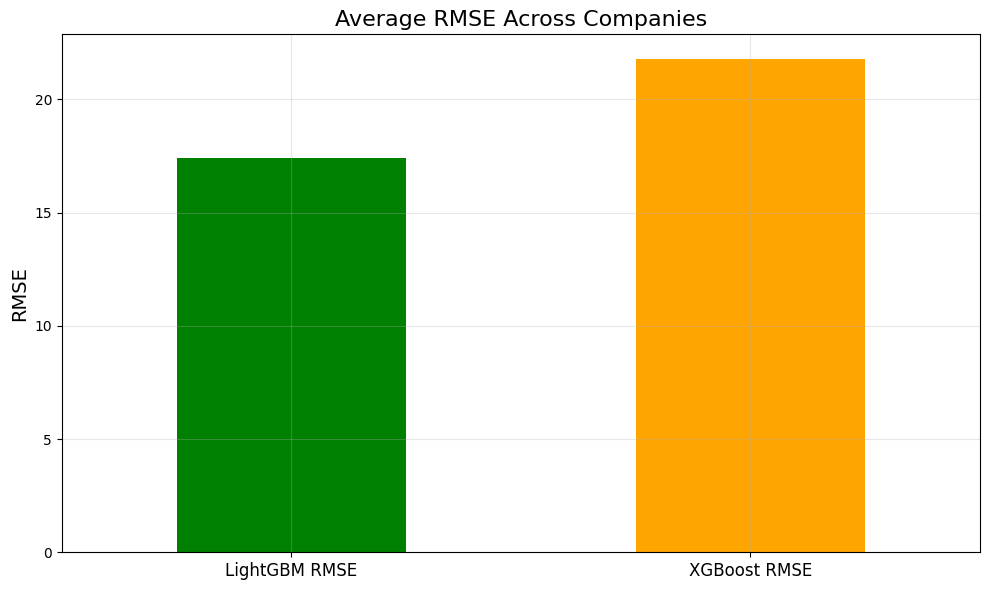

In [ ]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/merged datacalculate MV,return.csv')

# Convert Trade Date to datetime
data['Trade Date'] = pd.to_datetime(data['Trade Date'], errors='coerce')

# Initialize lists to collect results
results = []

# Group data by Acquirer Name
grouped_data = data.groupby('Acquirer Name')

# Iterate over each company
for company, group in grouped_data:
    print(f"Processing {company}...")

    # Feature Engineering for the company
    group = group.copy()
    group['Rolling Volatility'] = group['Daily Return'].rolling(window=20).std()
    group['Lagged Return 1'] = group['Daily Return'].shift(1)
    group['Lagged Return 5'] = group['Daily Return'].shift(5)

    # Drop rows with NaN values
    group.dropna(inplace=True)

    # Split into pre-M&A and post-M&A
    pre_mna_data = group[group['Period'] == 'Pre-M&A']
    post_mna_data = group[group['Period'] == 'Post-M&A']

    # Check if both pre-M&A and post-M&A data exist for the company
    if pre_mna_data.empty or post_mna_data.empty:
        print(f"Skipping {company} due to insufficient data.")
        continue

    # Define features and target
    features = ['MA_20', 'MA_50', 'MA_200', 'Relative Day', 'Rolling Volatility', 'Lagged Return 1', 'Lagged Return 5']
    target = 'Daily Return'

    X_train = pre_mna_data[features]
    y_train = pre_mna_data[target]
    X_test = post_mna_data[features]
    y_test = post_mna_data[target]

    # Initialize models
    lgbm_model = LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
    xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

    # Train models
    lgbm_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred_lgbm = lgbm_model.predict(X_test)
    y_pred_xgb = xgb_model.predict(X_test)

    # Evaluate models
    metrics = {}
    for model_name, y_pred in zip(['LightGBM', 'XGBoost'], [y_pred_lgbm, y_pred_xgb]):
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        metrics[model_name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

    # Store results for each company
    results.append({
        "Company": company,
        "LightGBM MSE": metrics['LightGBM']['MSE'],
        "LightGBM MAE": metrics['LightGBM']['MAE'],
        "LightGBM RMSE": metrics['LightGBM']['RMSE'],
        "LightGBM R2": metrics['LightGBM']['R2'],
        "XGBoost MSE": metrics['XGBoost']['MSE'],
        "XGBoost MAE": metrics['XGBoost']['MAE'],
        "XGBoost RMSE": metrics['XGBoost']['RMSE'],
        "XGBoost R2": metrics['XGBoost']['R2'],
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("Model Comparison Metrics:")
print(results_df)

# Visualization: Average RMSE across companies
plt.figure(figsize=(10, 6))
avg_rmse = results_df[['LightGBM RMSE', 'XGBoost RMSE']].mean()
avg_rmse.plot(kind='bar', color=['green', 'orange'])
plt.title('Average RMSE Across Companies', fontsize=16)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
results_df.to_csv('results1.csv', index=False)

In [ ]:
results_df.to_csv('results.csv', index=False)